-   Evaluate the results
-   Analyze the result
-   Draw box plot for orignal model [sin/mul]
-   Compared best result from previous step, with [dir] uncertainty.

In [1]:
import numpy as np
import glob
import os
import re
import pandas as pd
import warnings
import json
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [16]:
df = pd.read_csv("../RESULTS.csv")
df = df.drop_duplicates(keep='last')
len(df)

24756

In [4]:
datasets = ['KIDNEY'  ,  'BRAIN_TUMOR_TASK1','HEART', 'SIJ', 'LUNG', 'PROSTATE_TASK1', 'PROSTATE_TASK2', 'KNEE',    'BRAIN_GROWTH', 'SIJ', 'LUNG' , 'PANCREAS']
models = ['ensemble','hier_probabilistic',  'bayesian',  'probabilistic']
uncertainty_types_label = {
    'SINGLE':"SIN", 
    'MULTIPLE':"MUL",
    'UNCERTAINTY_CLASS':"DIR"
}

In [5]:
# np.median([0.8423631 ,0.81677526 ,0.9139277 ,0.9126598 ,0.93958634 ,0.76845926 ,0.43078318 ])
# np.median([
#     [0.571668 , 0.2691686 , 0.11787171 , 0.1180602 , 0.23690306 , 0.20262124 , 0.45192507],
#     [0.71250045 , 0.0769599 , 0.10183138 , 0.07789487 , 0.051698357 , 0.26568928 , 0.15390302]
# ],axis=1)

In [6]:
df[(df["dataset"]=="BRAIN_TUMOR_TASK1") & (df["metric"]=="ged") & (df["type"].isin(["MUL","SIN"]))].groupby(["type","model"])["result"].median()


type  model             
MUL   bayesian              0.101831
      ensemble              0.069741
      hier_probabilistic    0.068143
      probabilistic         0.052024
SIN   bayesian              0.236903
      ensemble              0.079476
      hier_probabilistic    0.140045
      probabilistic         0.102286
Name: result, dtype: float64

In [7]:
df_boxplot=df[(df["dataset"]=="BRAIN_TUMOR_TASK1") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# .groupby(["type","model"])["result"].median()

In [78]:
np.unique(df["model"])

array(['bayesian', 'ensemble', 'hier_probabilistic', 'probabilistic'],
      dtype=object)

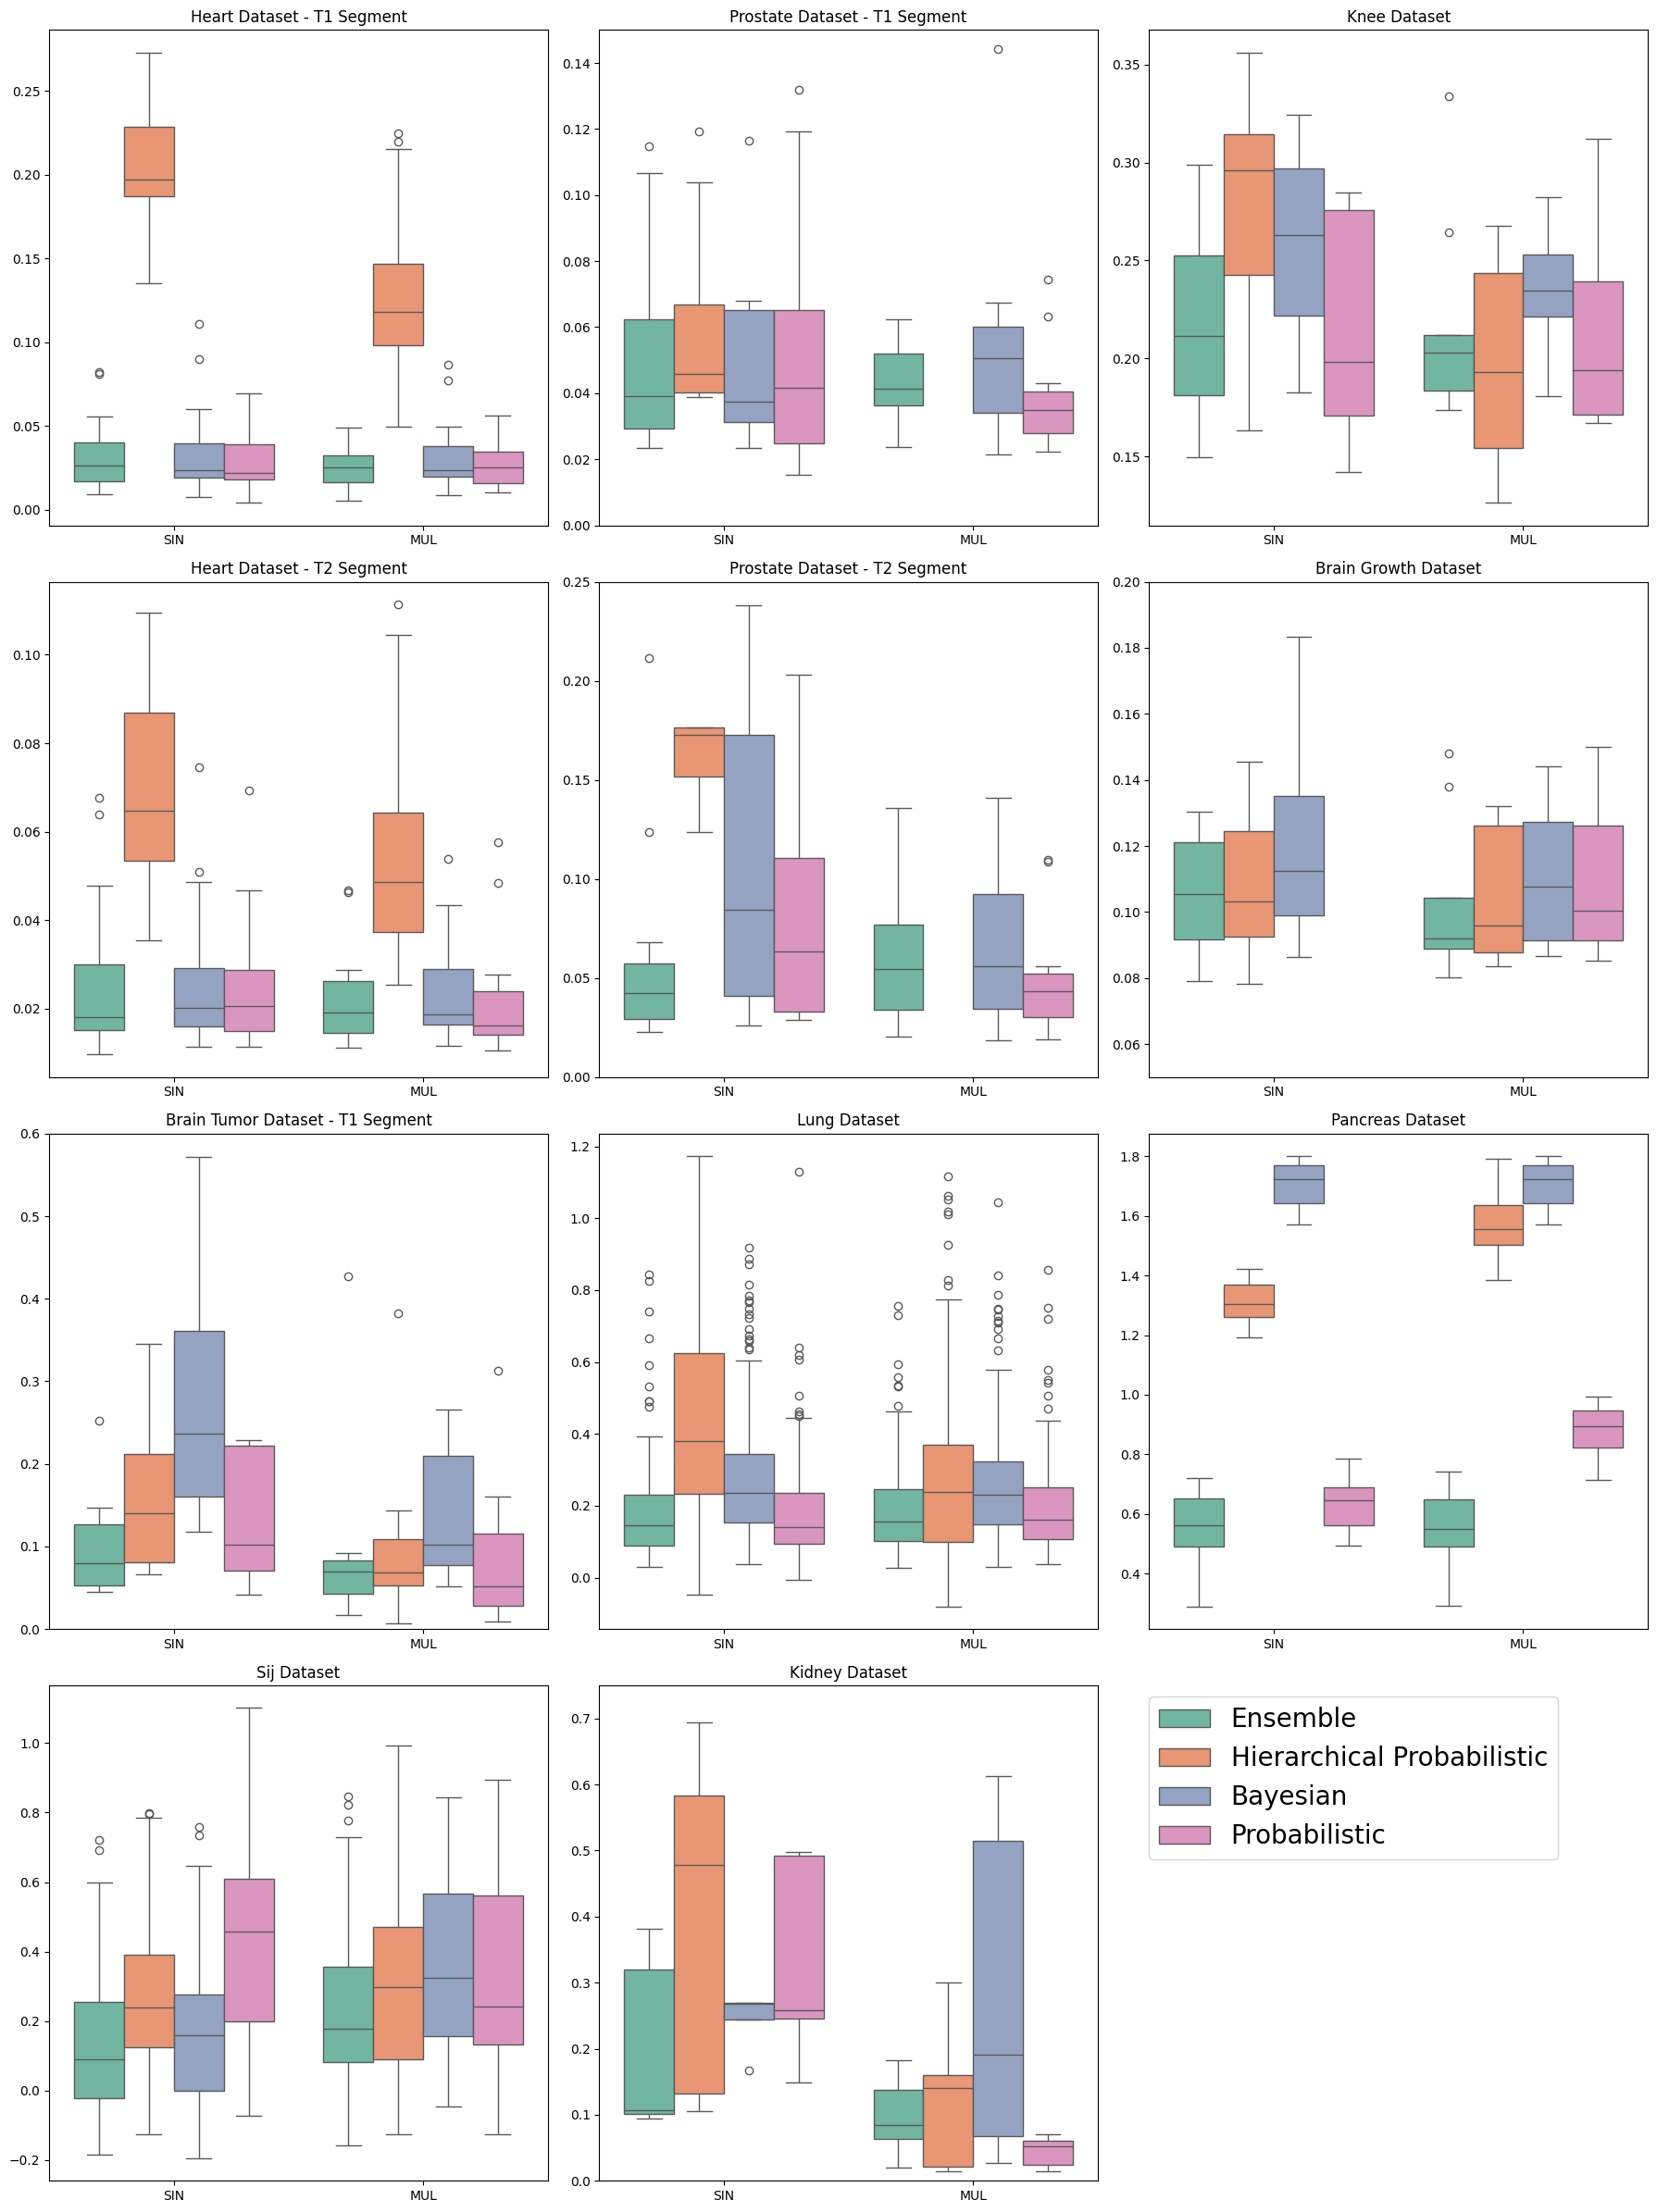

In [10]:
df_boxplot=df[(df["metric"]=="ged") & (df["type"].isin(["MUL","SIN"]))]
datasets = {
    'HEART_TASK1':["Heart Dataset - T1 Segment",[]],
    'HEART_TASK2':["Heart Dataset - T2 Segment",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[0,0.6]],
    'SIJ':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[0,0.15]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[0,0.25]],
    'LUNG':["",[]],  'KIDNEY':["",[0,0.75]],'KNEE':["",[]],
    'BRAIN_GROWTH':["",[0.05,0.2]], 'PANCREAS':["",[]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    if dataset.startswith("HEART"):
        segment=("LUNGS" if dataset.endswith("TASK1") else "HEART")
        df_draw=df_boxplot[
            (df_boxplot["dataset"]=="HEART") & 
            (df_boxplot["segment"]==segment)
        ]
    else:
        df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"

    # print(np.unique(df_draw["segment"]))
    
    j = int(index / 4)
    i = index % 4
        
        
    sns.boxplot(data=df_draw,x="type",y="result",hue="model", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])
    
    # if index!=len(datasets)-1:
    axes[i][j].legend_.remove()


# fig.suptitle("Result of GED Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",  # Options: 'upper right', 'lower left', 'center right', etc.
    bbox_to_anchor=(0.815, 0.155),  # x, y: 0.5 is centered; y negative puts it below
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)
    

plt.tight_layout()
plt.show()


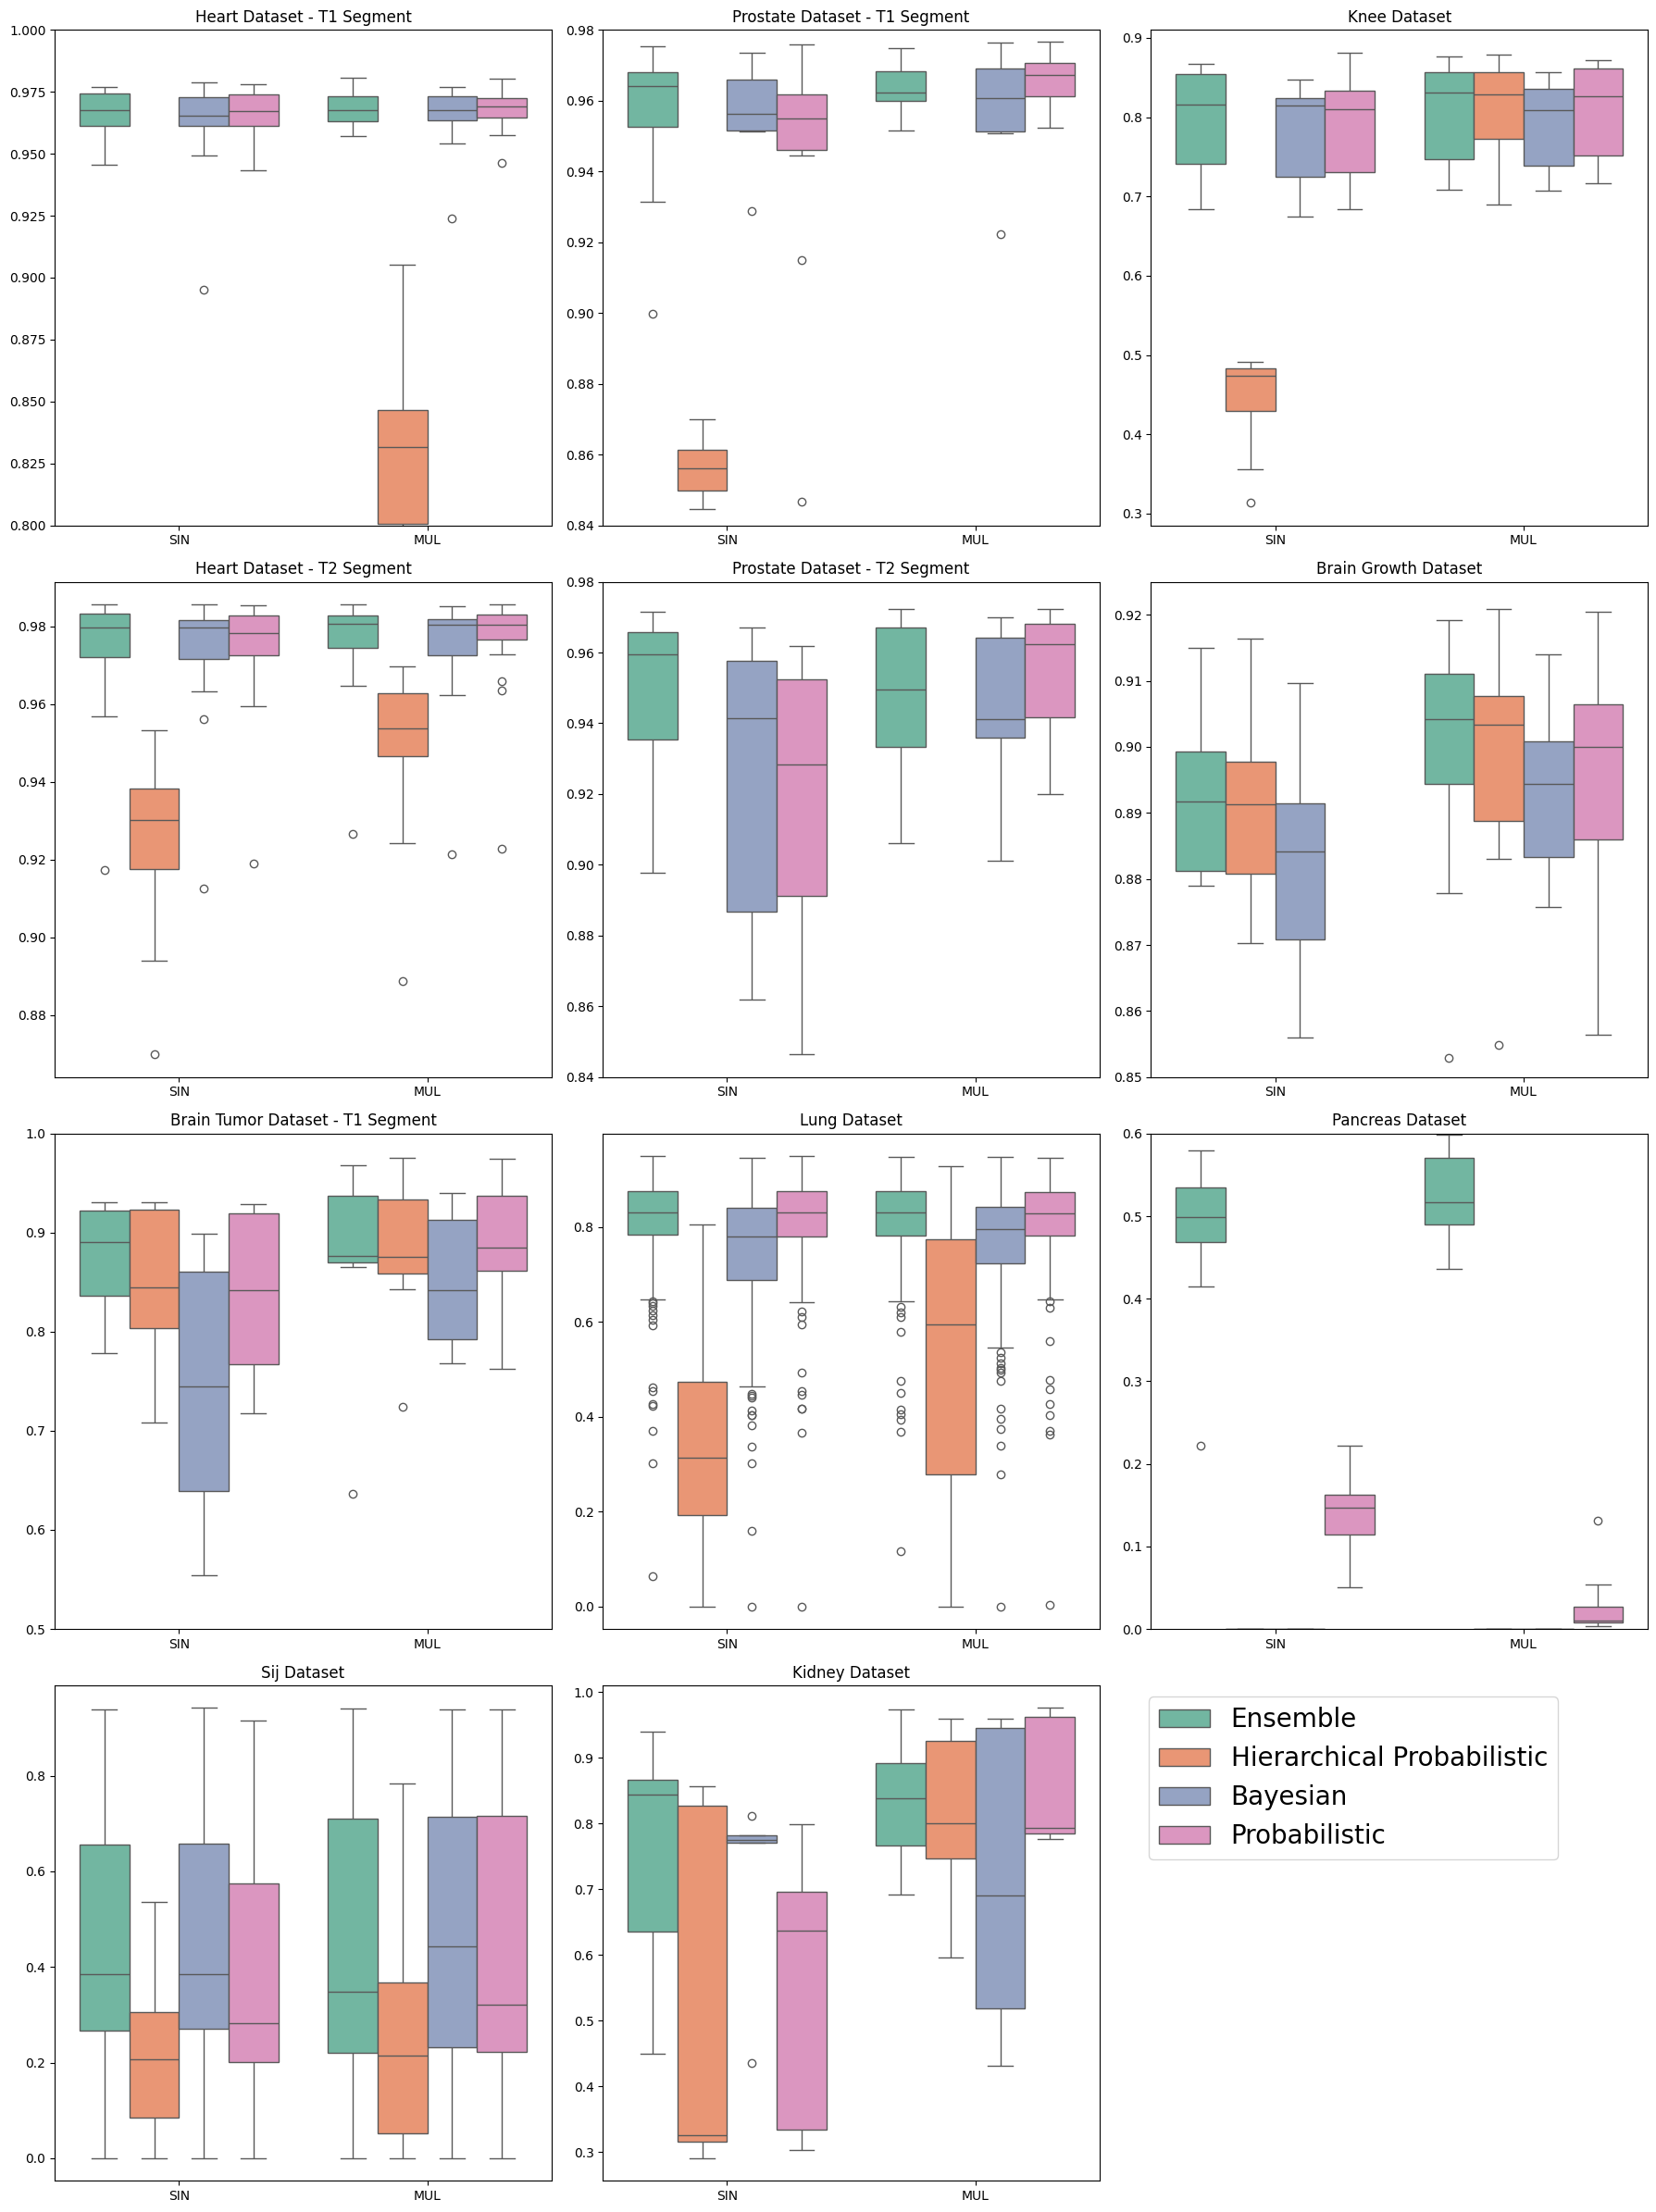

In [9]:
df_boxplot=df[(df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]
datasets = {
    'HEART_TASK1':["Heart Dataset - T1 Segment",[0.8,1]],
    'HEART_TASK2':["Heart Dataset - T2 Segment",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[0.5,1]],
    'SIJ':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[0.84,0.98]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[0.84,0.98]],
    'LUNG':["",[]],  'KIDNEY':["",[]],'KNEE':["",[]],
    'BRAIN_GROWTH':["",[0.85,0.925]], 'PANCREAS':["",[0,0.6]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    if dataset.startswith("HEART"):
        segment=("LUNGS" if dataset.endswith("TASK1") else "HEART")
        df_draw=df_boxplot[
            (df_boxplot["dataset"]=="HEART") & 
            (df_boxplot["segment"]==segment)
        ]
    else:
        df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"

    # print(np.unique(df_draw["segment"]))
    
    j = int(index / 4)
    i = index % 4
        
        
    sns.boxplot(data=df_draw,x="type",y="result",hue="model", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])
    
    # if index!=len(datasets)-1:
    axes[i][j].legend_.remove()


# fig.suptitle("Result of DICE Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",  # Options: 'upper right', 'lower left', 'center right', etc.
    bbox_to_anchor=(0.815, 0.155),  # x, y: 0.5 is centered; y negative puts it below
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)
    

plt.tight_layout()
plt.show()

In [34]:
datasets.keys()

dict_keys(['KIDNEY', 'BRAIN_TUMOR_TASK1', 'HEART', 'SIJ', 'LUNG', 'PROSTATE_TASK1', 'PROSTATE_TASK2', 'KNEE', 'BRAIN_GROWTH', 'PANCREAS'])

In [42]:
# df_boxplot=df[(df["dataset"]=="LUNG") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# sns.boxplot(
#     data=df_boxplot,
#     x="type",
#     y="result",
#     hue="model",  # Separate boxes within each 'type' by model
#     palette="Set2"
# )

# plt.title("Boxplot of Result grouped by Type and Model")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [39]:
# df_boxplot=df[(df["dataset"]=="HEART") & (df["segment"]=="HEART") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# sns.boxplot(
#     data=df_boxplot,
#     x="type",
#     y="result",
#     hue="model",  # Separate boxes within each 'type' by model
#     palette="Set2"
# )

# plt.title("Boxplot of Result grouped by Type and Model")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [40]:
# df_boxplot=df[(df["dataset"]=="HEART") & (df["segment"]=="LUNGS") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# sns.boxplot(
#     data=df_boxplot,
#     x="type",
#     y="result",
#     hue="model",  # Separate boxes within each 'type' by model
#     palette="Set2"
# )
# plt.ylim(0.9,1)
# plt.title("Boxplot of Result grouped by Type and Model")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [41]:
# df_boxplot=df[(df["dataset"]=="BRAIN_TUMOR_TASK1") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# sns.boxplot(
#     data=df_boxplot,
#     x="type",
#     y="result",
#     hue="model",  # Separate boxes within each 'type' by model
#     palette="Set2"
# )

# plt.title("Boxplot of Result grouped by Type and Model")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [42]:
# df_boxplot=df[(df["dataset"]=="BRAIN_GROWTH") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# sns.boxplot(
#     data=df_boxplot,
#     x="type",
#     y="result",
#     hue="model",  # Separate boxes within each 'type' by model
#     palette="Set2"
# )
# plt.ylim(0.8, 1)
# plt.title("Boxplot of Result grouped by Type and Model")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [43]:
# df_boxplot=df[(df["dataset"]=="PROSTATE_TASK2") & (df["metric"]=="dice") & (df["type"].isin(["MUL","SIN"]))]

# sns.boxplot(
#     data=df_boxplot,
#     x="type",
#     y="result",
#     hue="model",  # Separate boxes within each 'type' by model
#     palette="Set2"
# )
# plt.ylim(0.8, 1)
# plt.title("Boxplot of Result grouped by Type and Model")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [19]:
# df.pivot_table(
#     index=["dataset", "type", "model", "segment"],
#     columns="metric",
#     values="result",
#     aggfunc="mean"
# ).reset_index()

In [12]:
dataset_detail = {
    'BRAIN_TUMOR_TASK1':["TASK1","UNCERTAINTY"], 'KIDNEY':["KIDNEY","UNCERTAINTY"], 'KNEE':["KNEE","UNCERTAINTY"], 
    'PROSTATE_TASK1':["TASK1","UNCERTAINTY"], 'PROSTATE_TASK2':["TASK2","UNCERTAINTY"], 'BRAIN_GROWTH':["BRAIN_GROWTH","UNCERTAINTY"], 
    'PANCREAS':["PANCREAS","UNCERTAINTY"], 'SIJ':["SIJ","UNCERTAINTY"], 'LUNG':["LUNG","UNCERTAINTY"], 'HEART':["LUNGS","HEART","UNCERTAINTY"]
}

# DIRECT

In [30]:
df = pd.read_csv("../RESULTS_3.csv")
df = df.drop_duplicates(keep='last')



In [31]:
df_boxplot=df[(df["metric"]=="ndice") & (df["type"].isin(['DIR', 'DMU', 'DSI']))]

len(df_boxplot)

2613

In [32]:
df_boxplot.head()

,id,dataset,segment,type,model,result,metric
10,case_9,KIDNEY,KIDNEY,DIR,ensemble,0.972123,ndice
11,case_9,KIDNEY,KIDNEY,DSI,ensemble,0.917181,ndice
12,case_9,KIDNEY,KIDNEY,DMU,ensemble,0.969460,ndice
13,case_9,KIDNEY,UNCERTAINTY,DIR,ensemble,0.644666,ndice
14,case_9,KIDNEY,UNCERTAINTY,DSI,ensemble,0.283688,ndice


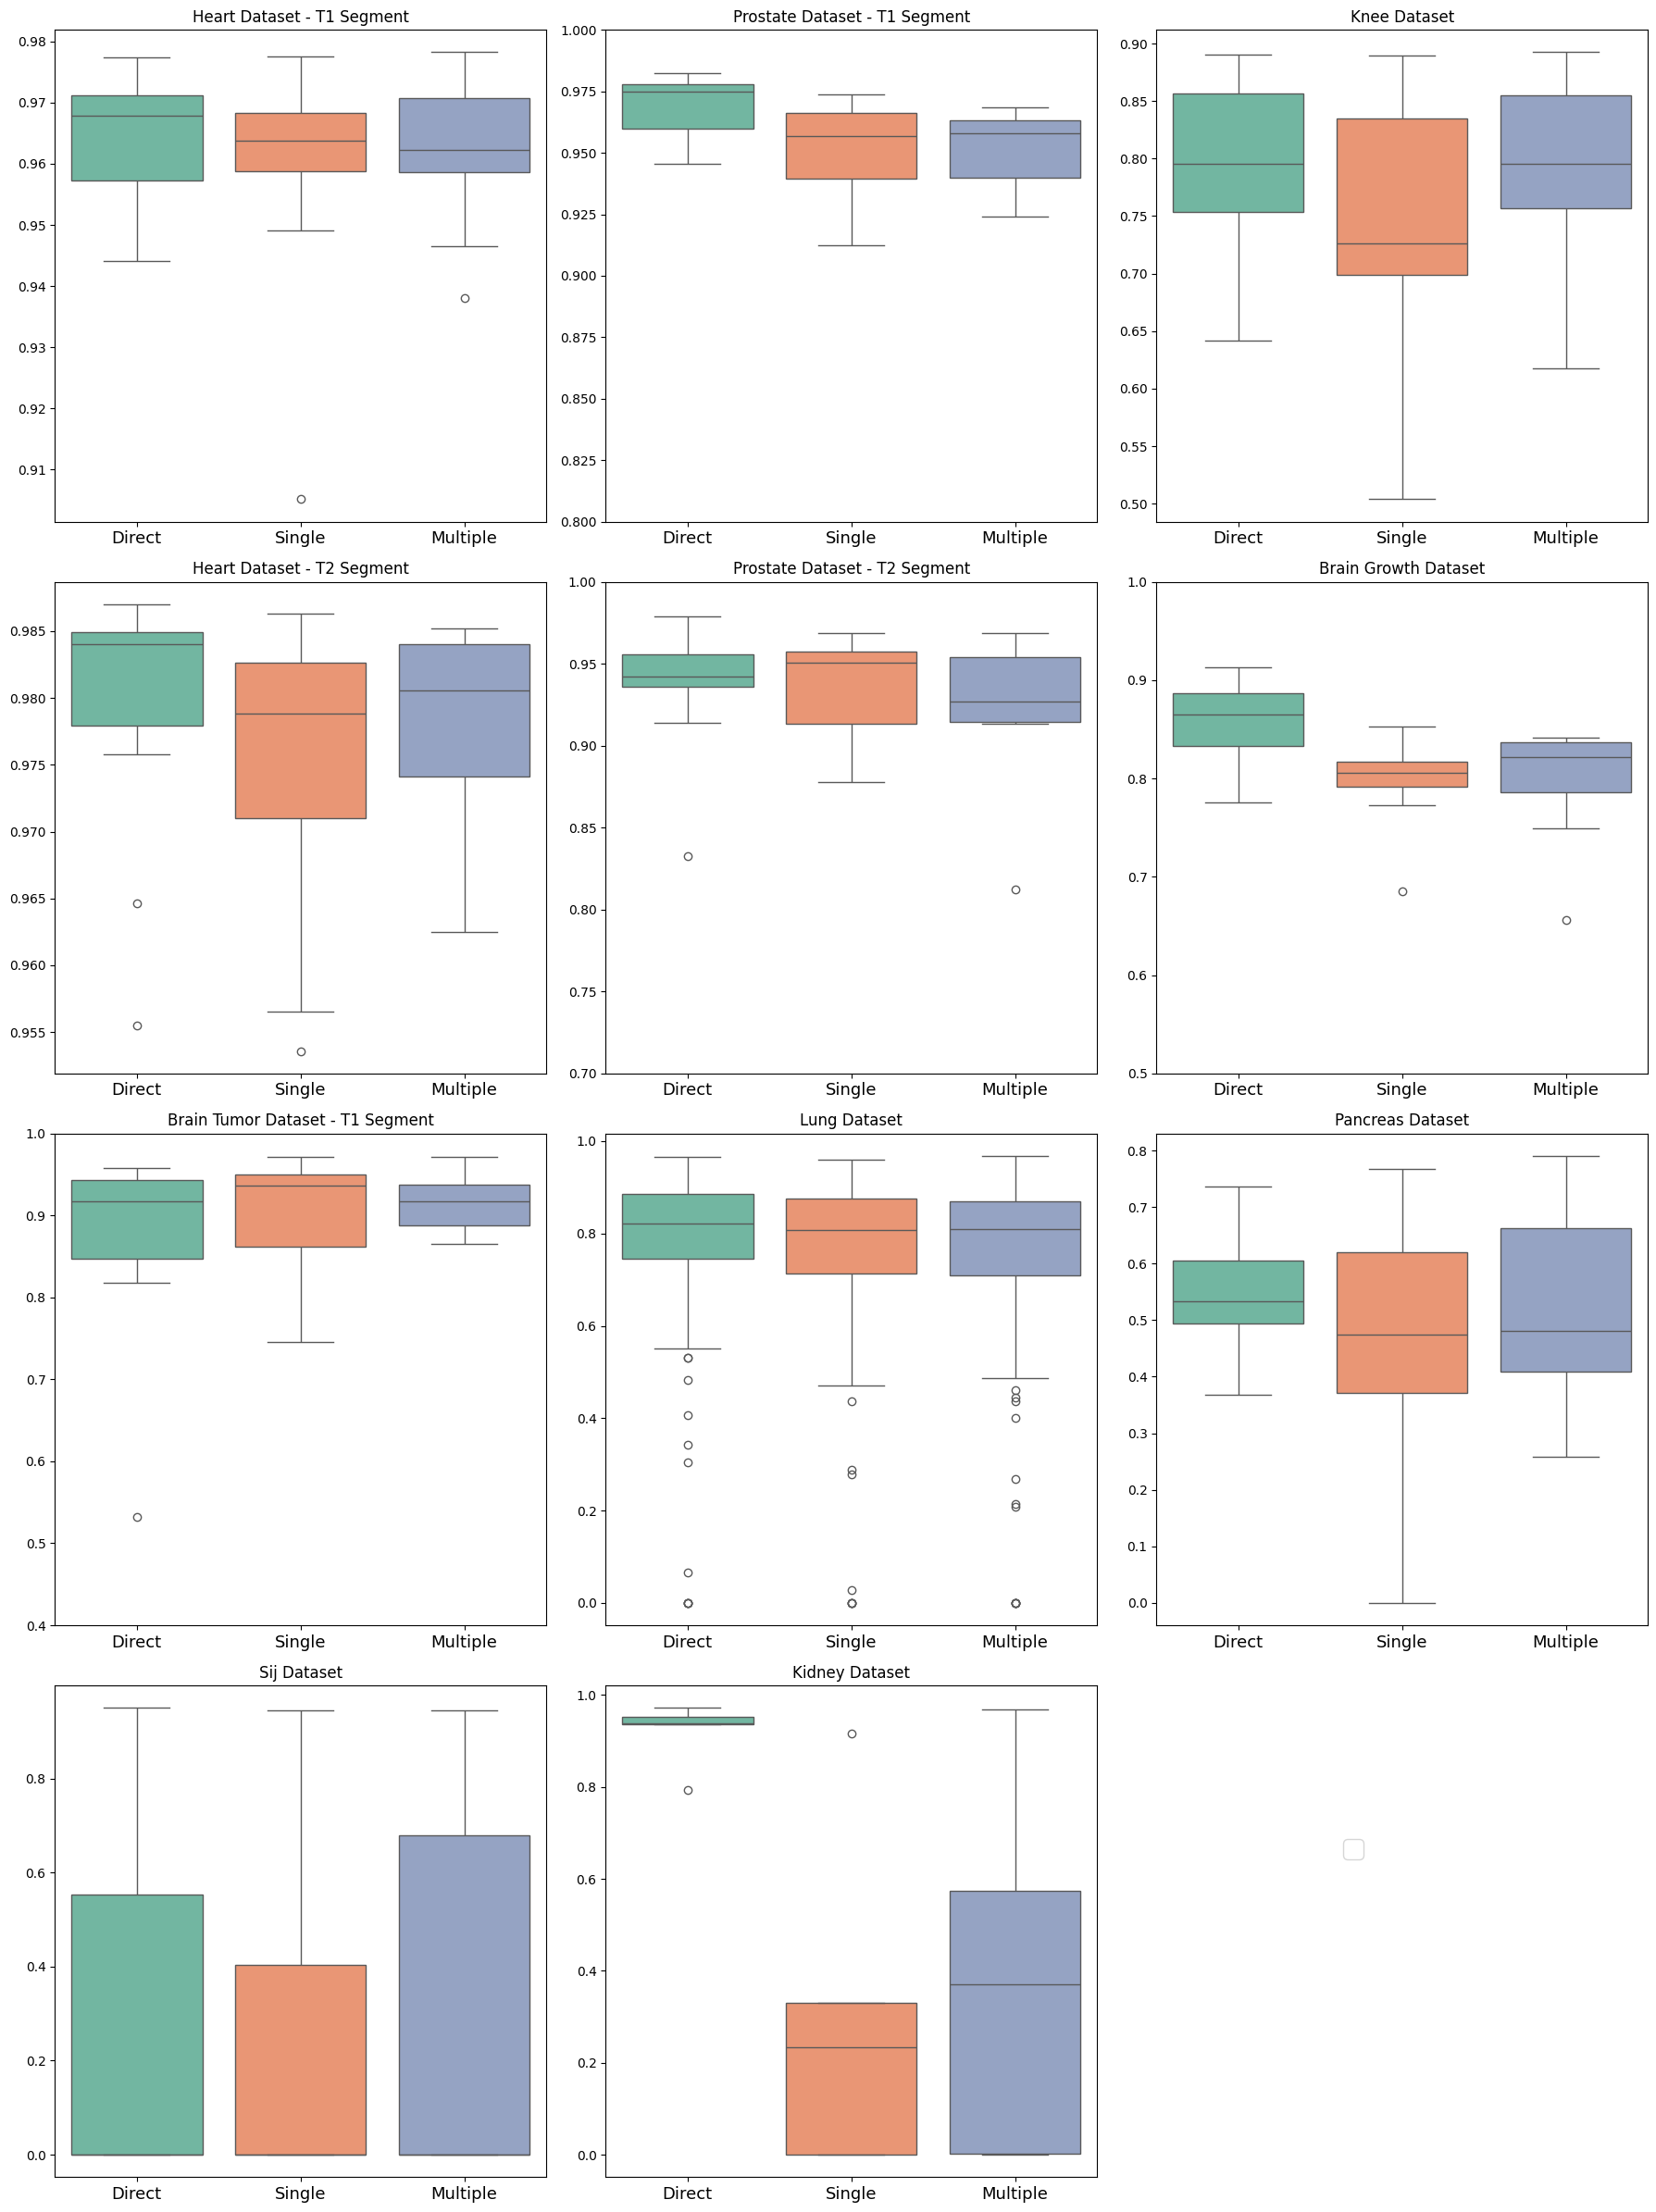

In [33]:
df_boxplot=df[(df["metric"]=="ndice") & (df["segment"]!="UNCERTAINTY") & (df["type"].isin(['DIR', 'DMU', 'DSI']))]
datasets = {
    'HEART_TASK1':["Heart Dataset - T1 Segment",[]],
    'HEART_TASK2':["Heart Dataset - T2 Segment",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[0.4,1]],
    'SIJ':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[0.8,1]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[0.7,1]],
    'LUNG':["",[]],  'KIDNEY':["",[]],'KNEE':["",[]],
    'BRAIN_GROWTH':["",[0.5,1]], 'PANCREAS':["",[]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    if dataset.startswith("HEART"):
        segment=("LUNGS" if dataset.endswith("TASK1") else "HEART")
        df_draw=df_boxplot[
            (df_boxplot["dataset"]=="HEART") & 
            (df_boxplot["segment"]==segment)
        ]
    else:
        df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"

    # print(np.unique(df_draw["segment"]))
    
    j = int(index / 4)
    i = index % 4
        
        
    xvalues = ["Label 1", "Label 2", "Label 3", "Label 4", "Label 5"]
    sns.boxplot(data=df_draw,x="type",y="result",hue="type", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    axes[i][j].set_xticklabels(["Direct","Single","Multiple"],rotation=0,fontsize=13)
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])
    


# fig.suptitle("Result of DICE Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",  # Options: 'upper right', 'lower left', 'center right', etc.
    bbox_to_anchor=(0.815, 0.155),  # x, y: 0.5 is centered; y negative puts it below
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)
    

plt.tight_layout()
plt.show()

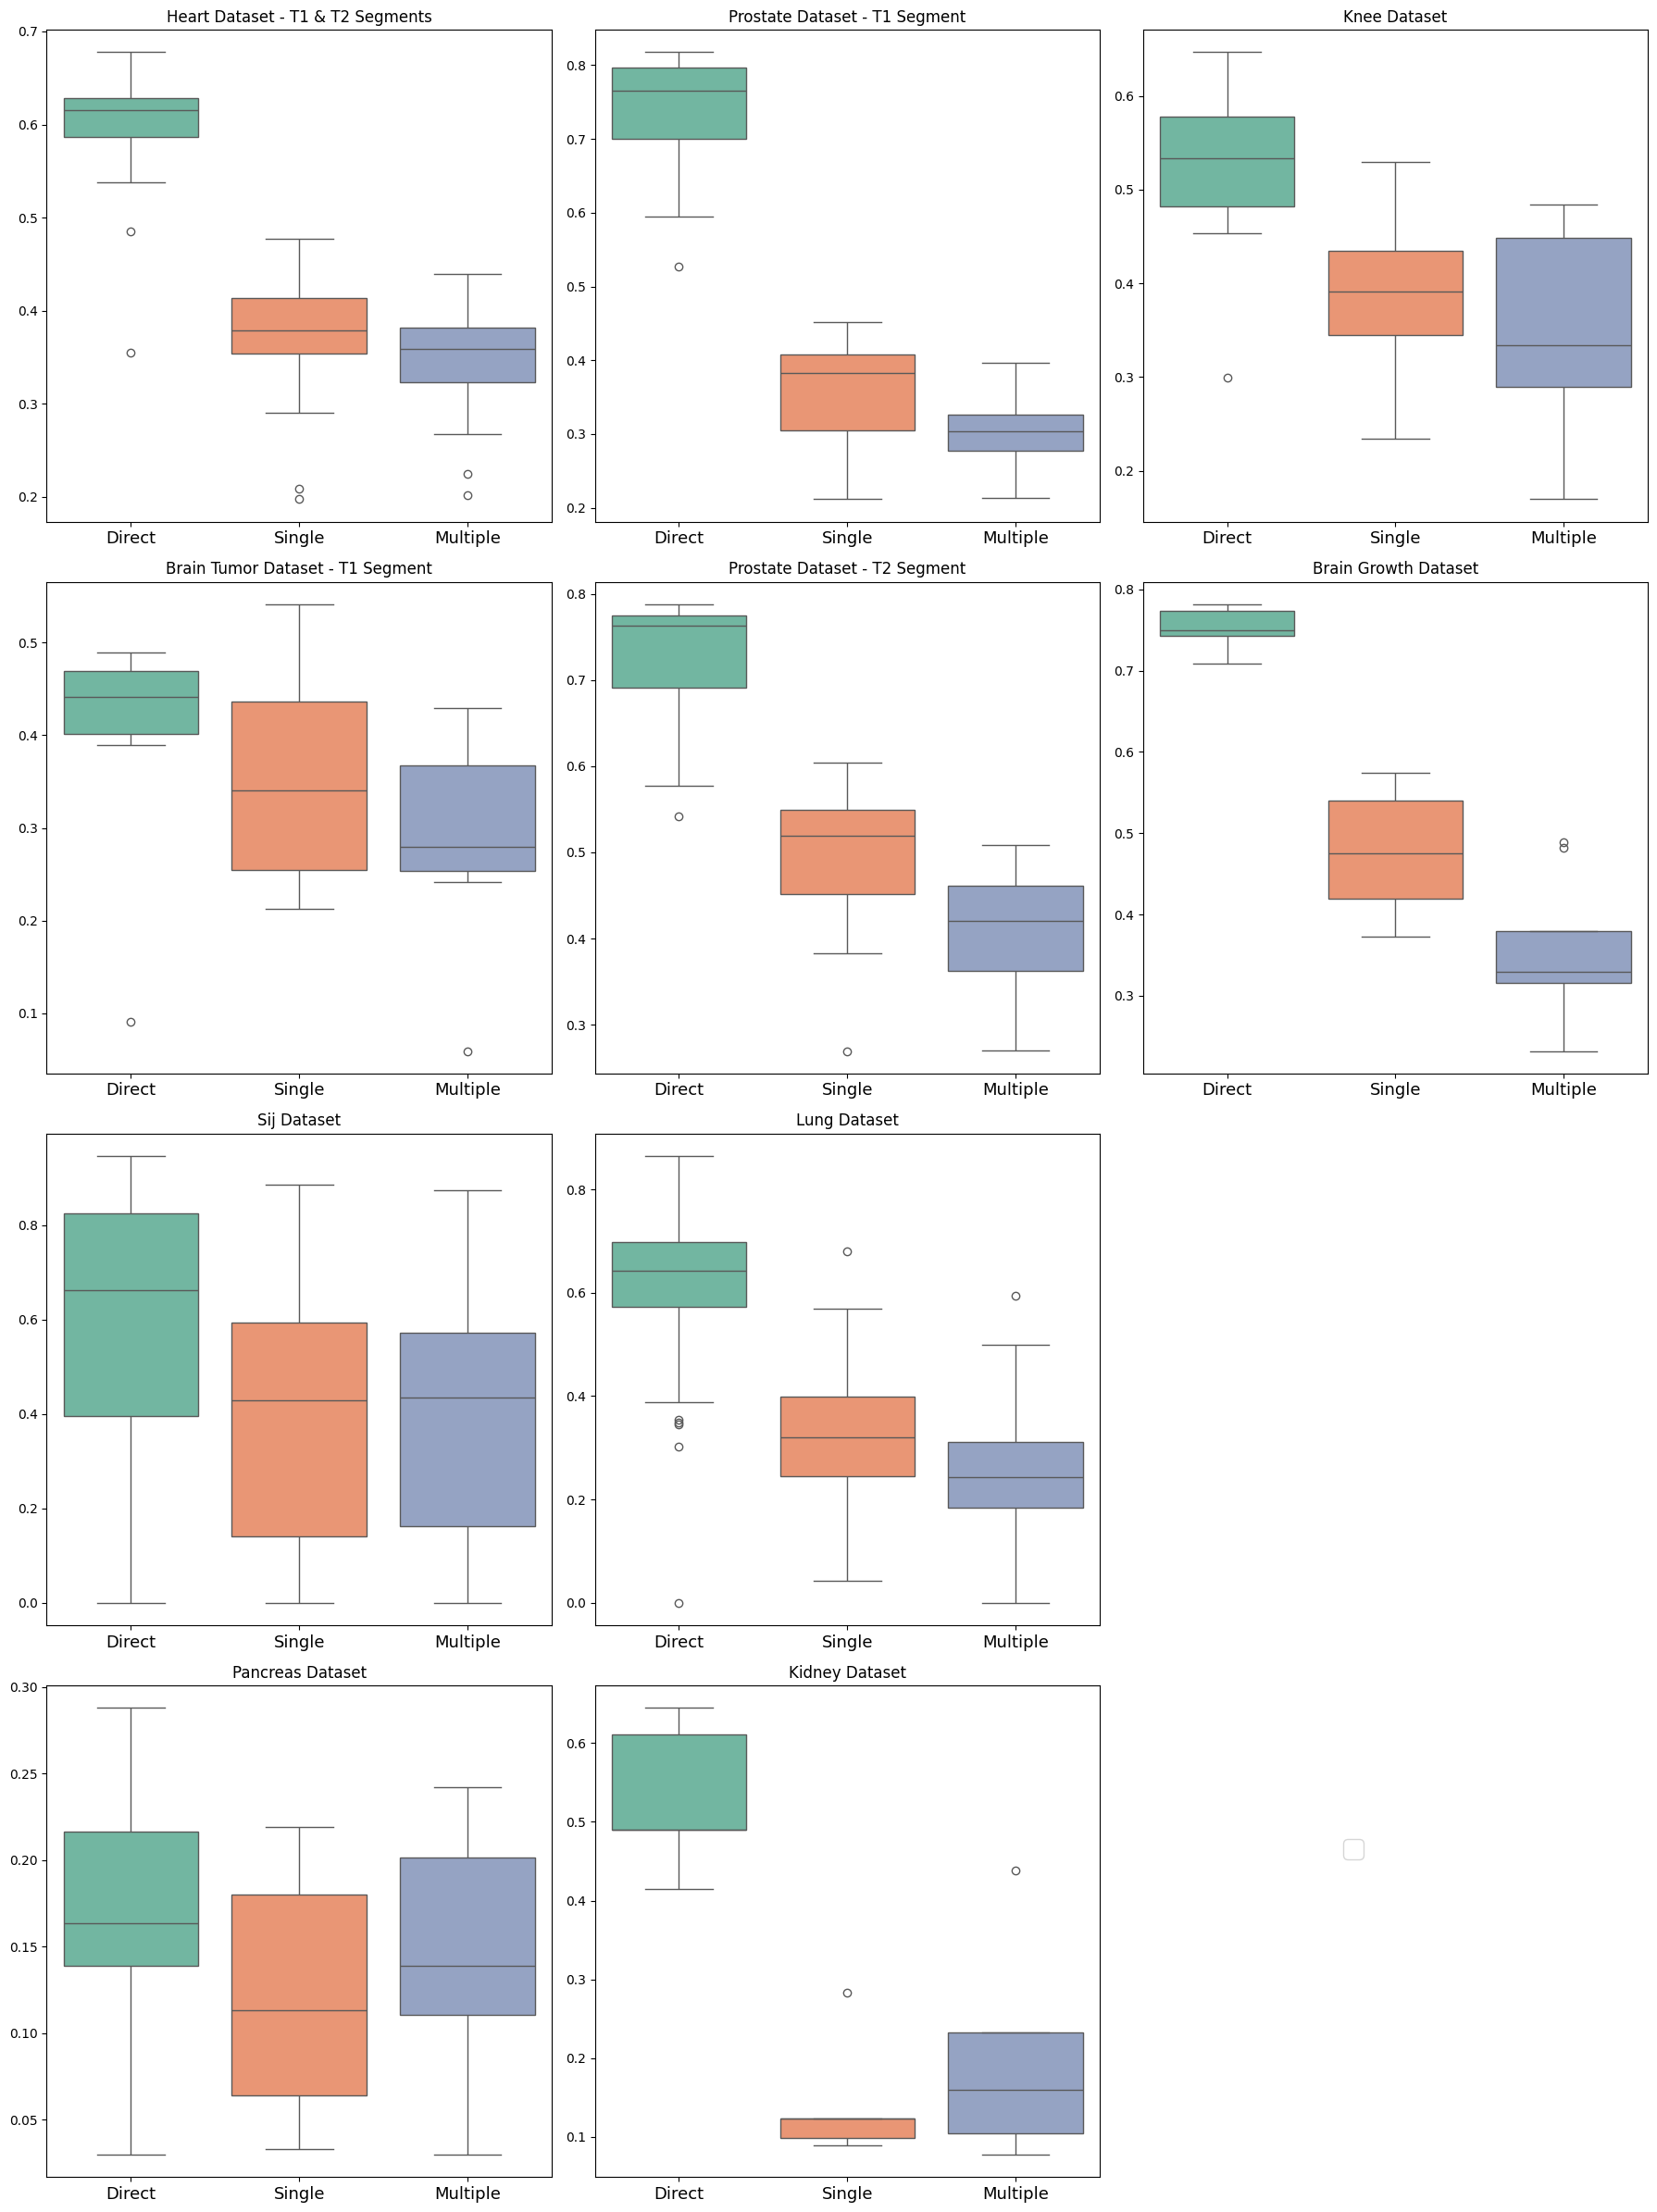

In [34]:
df_boxplot=df[(df["metric"]=="ndice") & (df["segment"]=="UNCERTAINTY") & (df["type"].isin(['DIR', 'DMU', 'DSI']))]
datasets = {
    'HEART':["Heart Dataset - T1 & T2 Segments",[]],
    'BRAIN_TUMOR_TASK1':["Brain Tumor Dataset - T1 Segment",[]],
    'SIJ':["",[]],
    'PANCREAS':["",[]], 
    'PROSTATE_TASK1':["Prostate Dataset - T1 Segment",[]], 
    'PROSTATE_TASK2':["Prostate Dataset - T2 Segment",[]],
    'LUNG':["",[]],  
    'KIDNEY':["",[]],
    'KNEE':["",[]],
    'BRAIN_GROWTH':["",[]]
}

# Set up the subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24),constrained_layout=True)
# axes = axes.flatten()

# Create a boxplot for each metric
for index, dataset in enumerate(datasets.keys()):
    
    
    df_draw=df_boxplot[(df_boxplot["dataset"]==dataset)]
        
    title =datasets[dataset][0] if len(datasets[dataset][0])>0 else dataset.replace("_"," ") + " Dataset"
    
    j = int(index / 4)
    i = index % 4
                
    sns.boxplot(data=df_draw,x="type",y="result",hue="type", palette="Set2",ax=axes[i][j])

    axes[i][j].set_title(f"{title.title()}")
    axes[i][j].set_xlabel("")
    axes[i][j].set_ylabel("")
    axes[i][j].set_xticklabels(["Direct","Single","Multiple"],rotation=0,fontsize=13)
    
    if len(datasets[dataset][1]) == 2:
        axes[i][j].set_ylim(*datasets[dataset][1])

# fig.suptitle("Result of DICE Metric Based on Each Dataset", fontsize=18, y=1)
# Hide any unused subplots

for iy, ix in np.ndindex(axes.shape):
    if not axes[iy, ix].has_data():
        axes[iy, ix].axis("off")
        
handles, labels = axes[0][0].get_legend_handles_labels()

labels = [label.replace("_"," ").capitalize() if label!="hier_probabilistic" else "Hierarchical Probabilistic" for label in labels]
# Add a single, shared legend for the whole figure
fig.legend(
    handles, labels,
    loc="lower center",
    bbox_to_anchor=(0.815, 0.155),
    # ncol=len(labels),
    frameon=True,
    fontsize=20
)

plt.tight_layout()
plt.show()

In [38]:
df_direct = df [(df["type"].isin(['DIR', 'DMU', 'DSI'])) & (df["metric"]=="ndice")]
len(df_direct)

2613

In [41]:
df_direct.groupby(["dataset","segment","type","model"])["result"].median()

dataset            segment       type  model   
BRAIN_GROWTH       BRAIN_GROWTH  DIR   ensemble    0.865143
                                 DMU   ensemble    0.821740
                                 DSI   ensemble    0.806111
                   UNCERTAINTY   DIR   ensemble    0.749925
                                 DMU   ensemble    0.329295
                                 DSI   ensemble    0.475126
BRAIN_TUMOR_TASK1  TASK1         DIR   ensemble    0.917620
                                 DMU   ensemble    0.917473
                                 DSI   ensemble    0.936409
                   UNCERTAINTY   DIR   ensemble    0.441118
                                 DMU   ensemble    0.279635
                                 DSI   ensemble    0.340114
HEART              HEART         DIR   ensemble    0.984025
                                 DMU   ensemble    0.980542
                                 DSI   ensemble    0.978815
                   LUNGS         DIR   ensemble    0

# Models

In [21]:
def draw_boxplot(df):
    df["type_model"] = df["type"].astype(str) + "_" + df["model"].astype(str)

    # List of metrics to plot
    metrics = ["dice", "gdc", "ged", "qdice"]
    n_metrics = len(metrics)
    n_cols = 2
    n_rows = (n_metrics + 1) // n_cols  # Adjust rows to fit all plots

    # Set up the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))
    axes = axes.flatten()

    # Create a boxplot for each metric
    for i, metric in enumerate(metrics):
        sns.boxplot(data=df, x="type_model", y=metric, ax=axes[i])
        axes[i].set_title(f"Boxplot of {metric} by Type+Model")
        axes[i].set_xlabel("Type + Model")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
    

In [ ]:
0.079 & 0.236 & 0.102 & 0.140 & 0.069 & 0.101 & 0.052 & 0.068

In [55]:
df_models = df [(df["type"].isin(["MUL","SIN"])) & (df["metric"]=="ged")]
# len(df_models)
df_models=df_models.groupby(["dataset","segment","type","model"])["result"].median().reset_index()


df_models=df_models.pivot_table(
    index=["dataset","segment"],
    columns=["type", "model"],
    values="result",
    aggfunc="median"
).reset_index()


new_order = [
    ('dataset', ''),
    ('segment', ''),
    ('SIN', 'ensemble'),
    ('SIN', 'bayesian'),
    ('SIN', 'probabilistic'),
    ('SIN', 'hier_probabilistic'),
    ('MUL', 'ensemble'),
    ('MUL', 'bayesian'),
    ('MUL', 'probabilistic'),
    ('MUL', 'hier_probabilistic')
]
df_models=df_models[new_order]


tmp = df_models.select_dtypes(include=[np.number])
df_models.loc[:, tmp.columns] = np.round(tmp,3)

df_models.head(15)

type             dataset       segment      SIN                         \
model                                  ensemble bayesian probabilistic   
0           BRAIN_GROWTH  BRAIN_GROWTH    0.105    0.113         0.503   
1      BRAIN_TUMOR_TASK1         TASK1    0.079    0.237         0.102   
2                  HEART         HEART    0.018    0.020         0.021   
3                  HEART         LUNGS    0.026    0.023         0.022   
4                 KIDNEY        KIDNEY    0.107    0.268         0.258   
5                   KNEE          KNEE    0.211    0.263         0.198   
6                   LUNG          LUNG    0.145    0.237         0.140   
7               PANCREAS      PANCREAS    0.562    1.725         0.647   
8         PROSTATE_TASK1         TASK1    0.039    0.037         0.042   
9         PROSTATE_TASK2         TASK2    0.042    0.084         0.064   
10                   SIJ           SIJ    0.089    0.158         0.458   

type                          MUL                                            
model hier_probabilistic ensemble bayesian probabilistic hier_probabilistic  
0                  0.103    0.092    0.108         0.100              0.096  
1                  0.140    0.070    0.102         0.052              0.068  
2                  0.065    0.019    0.019         0.016              0.049  
3                  0.197    0.025    0.024         0.025              0.118  
4                  0.478    0.085    0.191         0.053              0.141  
5                  0.296    0.203    0.235         0.194              0.193  
6                  0.380    0.157    0.232         0.161              0.238  
7                  1.305    0.551    1.725         0.895              1.557  
8                  0.046    0.041    0.051         0.035              0.480  
9                  0.173    0.055    0.056         0.043              1.052  
10                 0.240    0.178    0.323         0.242              0.297

In [ ]:
# np.unique(df["metric"])

array(['dice', 'gdc', 'ged', 'qdice'], dtype=object)

In [ ]:
df_models = df [(df["type"].isin(["MUL","SIN"])) & (df["metric"]=="dice")]
len(df_models)
df_models.groupby(["dataset","segment","type","model"])["result"].median()

dataset            segment       type  model             
BRAIN_GROWTH       BRAIN_GROWTH  MUL   bayesian              0.894420
                                       ensemble              0.904252
                                       hier_probabilistic    0.903345
                                       probabilistic         0.899954
                                 SIN   bayesian              0.884125
                                       ensemble              0.891759
                                       hier_probabilistic    0.891361
                                       probabilistic         0.480172
BRAIN_TUMOR_TASK1  TASK1         MUL   bayesian              0.842363
                                       ensemble              0.876270
                                       hier_probabilistic    0.875752
                                       probabilistic         0.885112
                                 SIN   bayesian              0.745134
                                

In [17]:
df_test_test=df_models.pivot(
    index=["id","dataset", "type", "model", "segment"],
    columns="metric",
    values="result"
).reset_index()
df_test_test=df_test_test[["id","dataset","type","model","segment","dice","gdc","ged","qdice"]]
    

df_test_test.head()

metric,id,dataset,type,model,segment,dice,gdc,ged,qdice
0,case_100,HEART,MUL,bayesian,HEART,0.971637,0.984611,0.032567,0.205143
1,case_100,HEART,MUL,bayesian,LUNGS,0.973657,0.986597,0.023823,0.208466
2,case_100,HEART,MUL,ensemble,HEART,0.972994,0.983793,0.028768,0.295562
3,case_100,HEART,MUL,ensemble,LUNGS,0.974176,0.985714,0.023029,0.305096
4,case_100,HEART,MUL,hier_probabilistic,HEART,0.949832,0.962469,0.052284,0.213352


BRAIN_TUMOR_TASK1


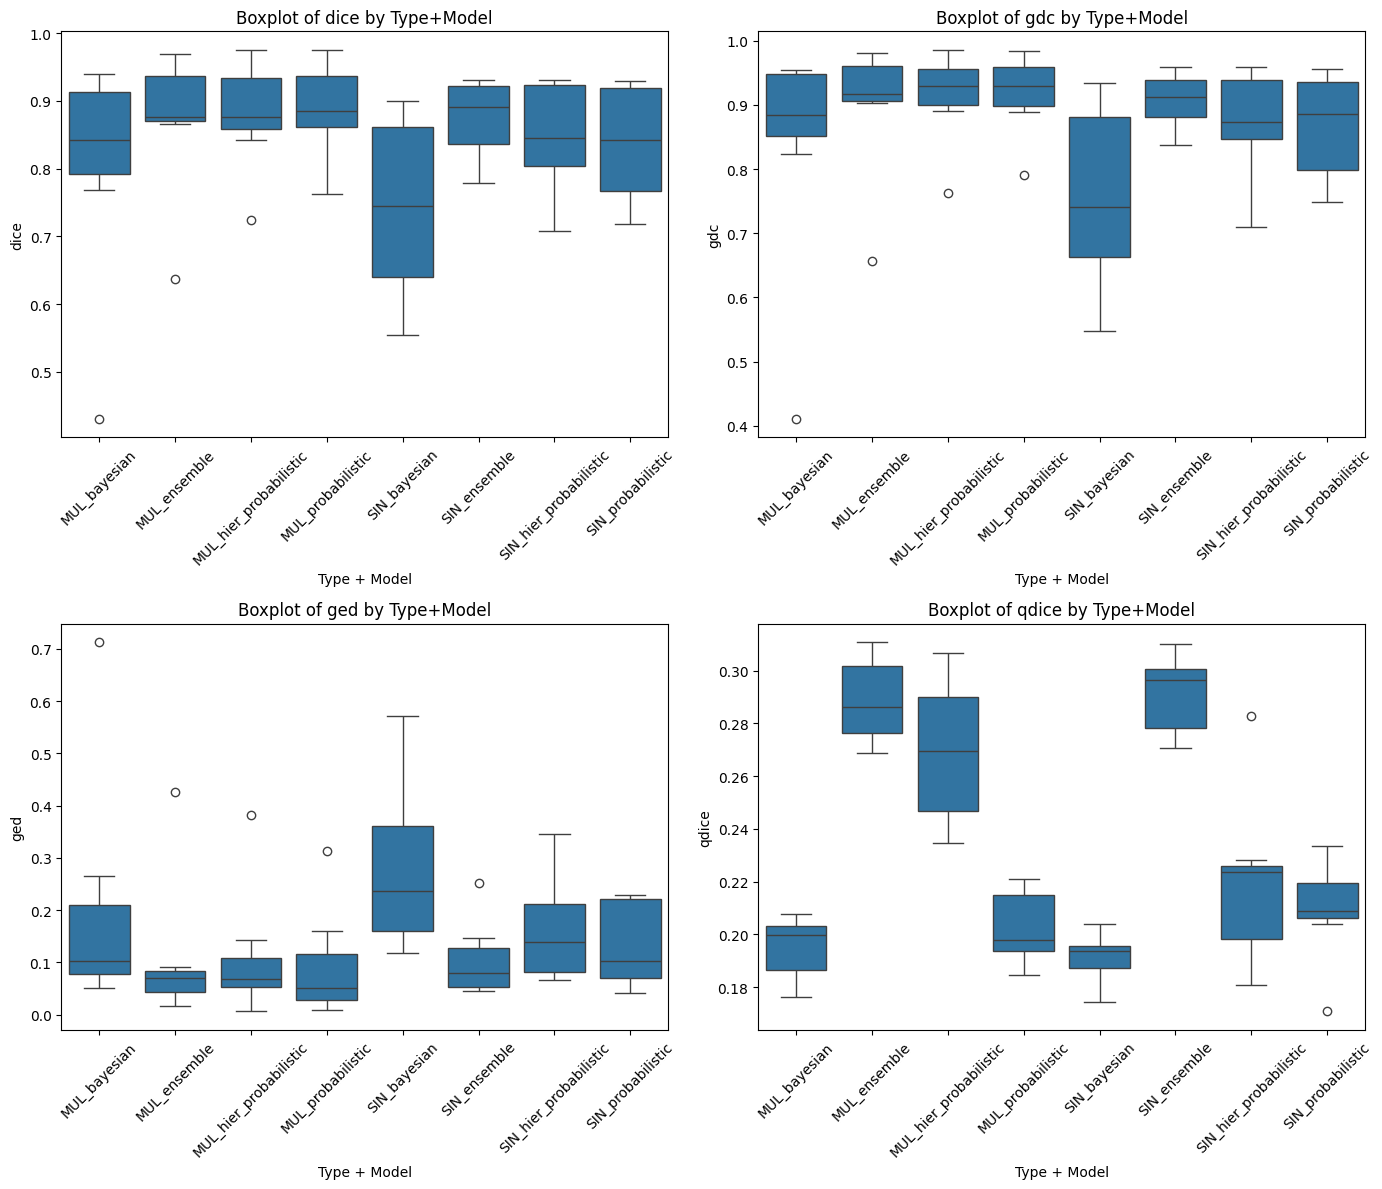

KIDNEY


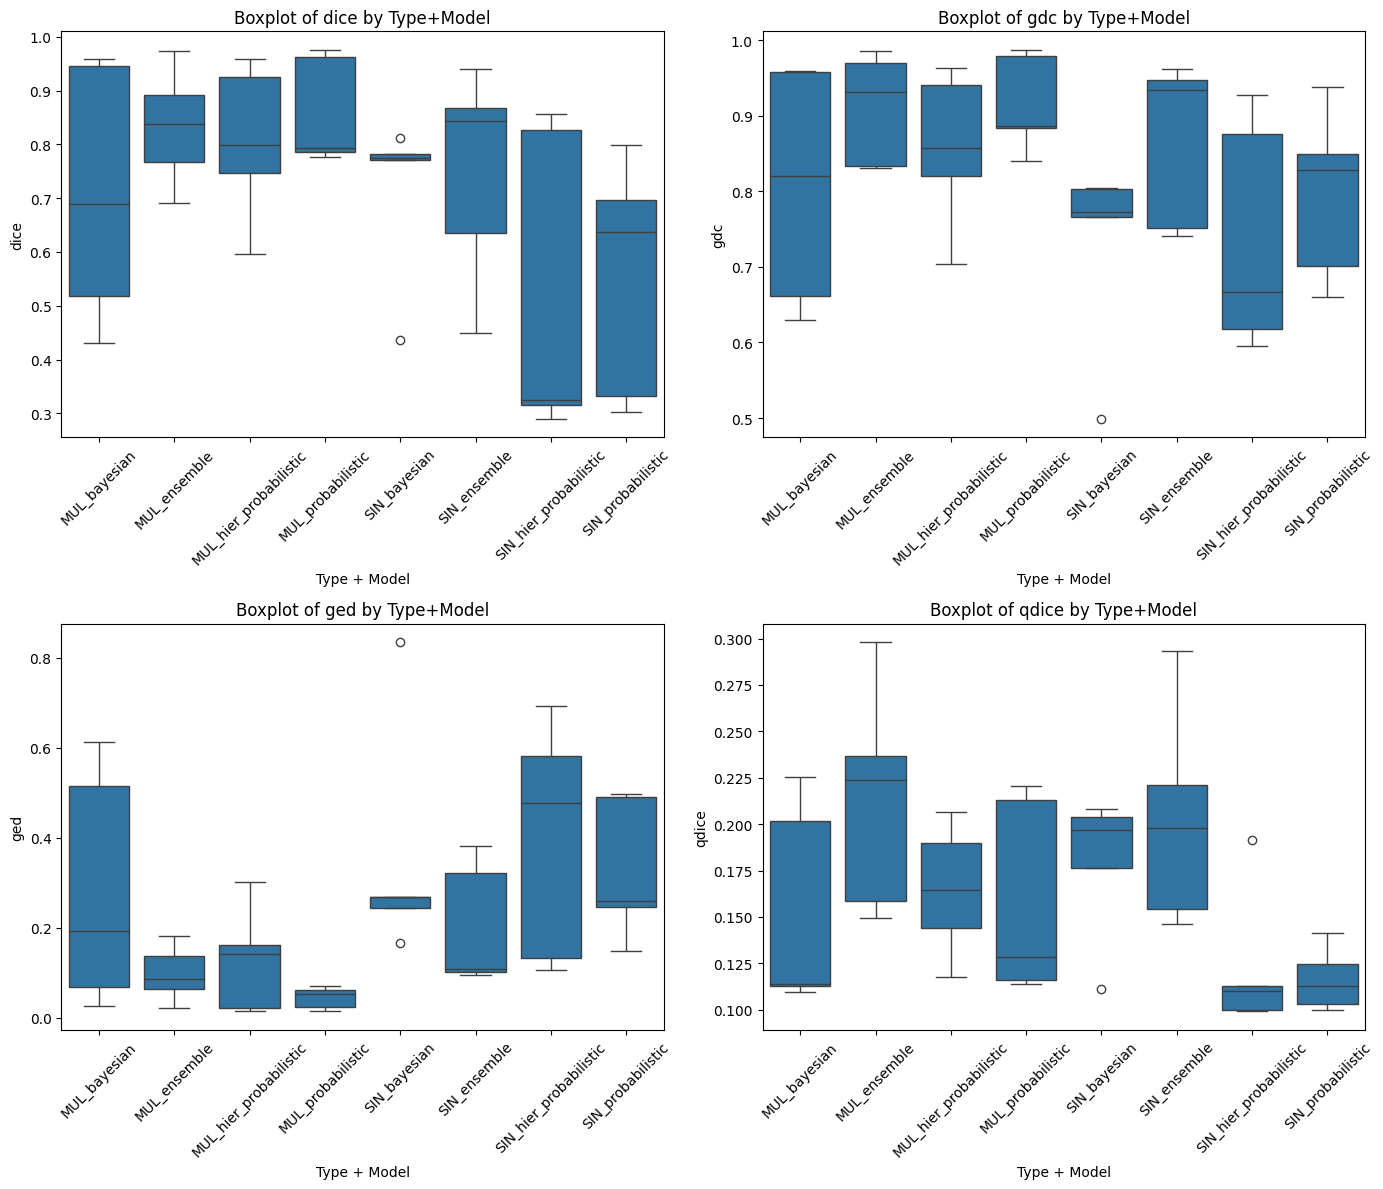

KNEE


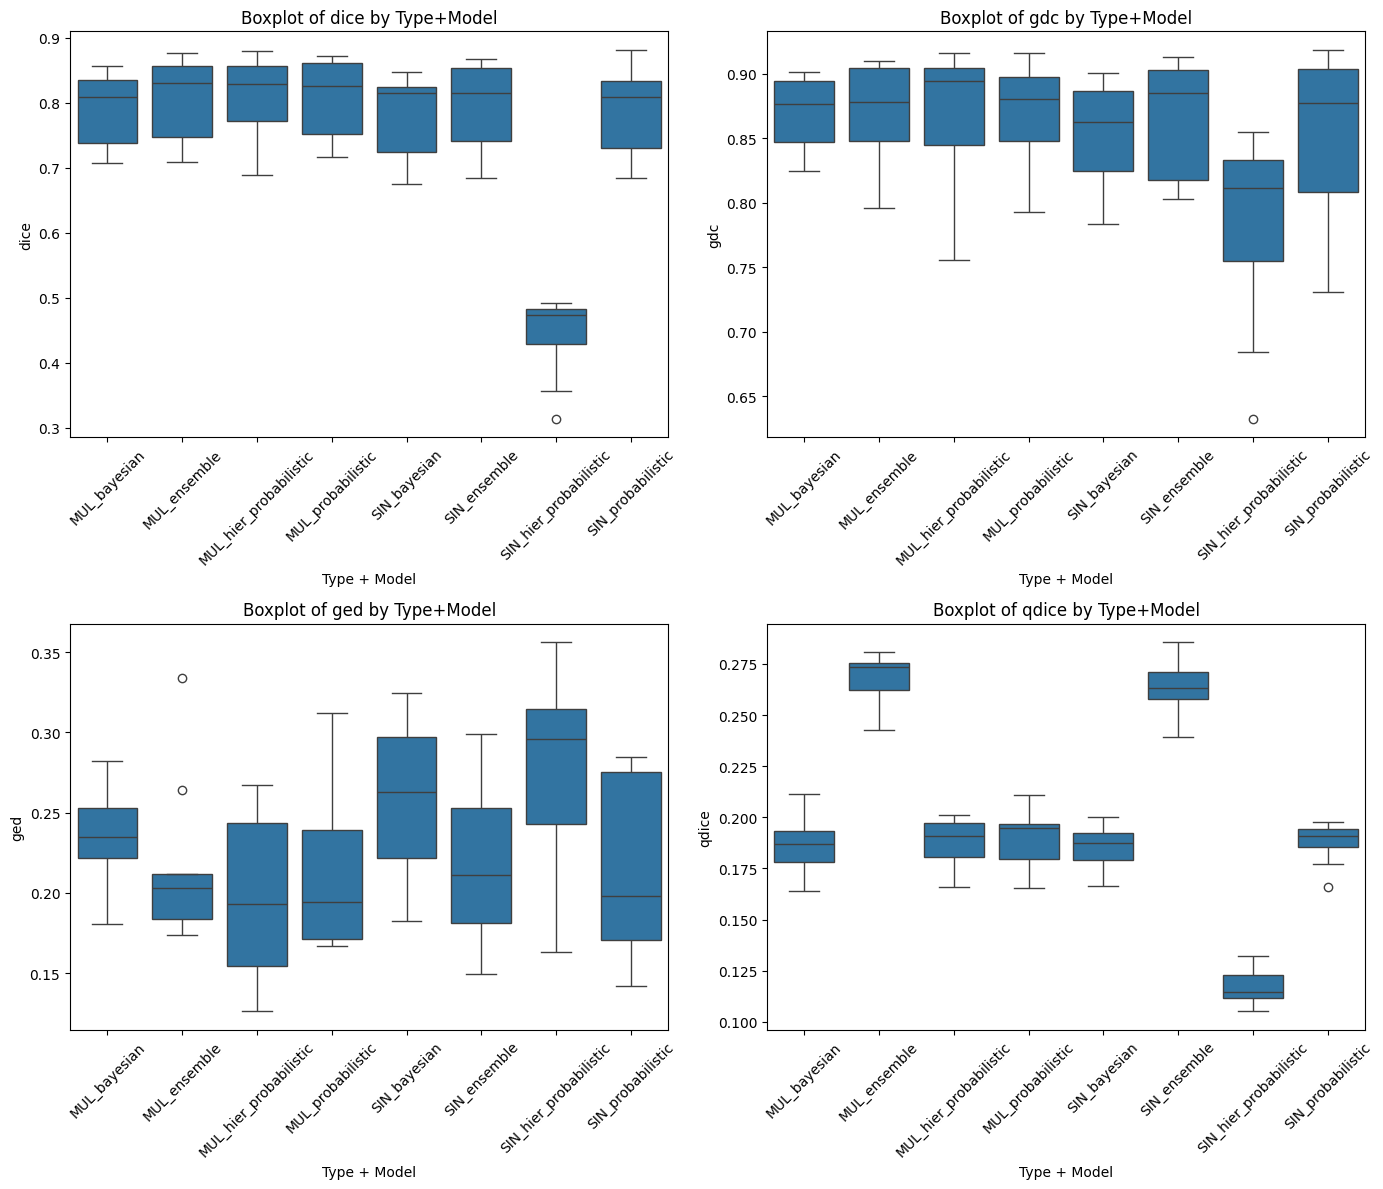

PROSTATE_TASK1


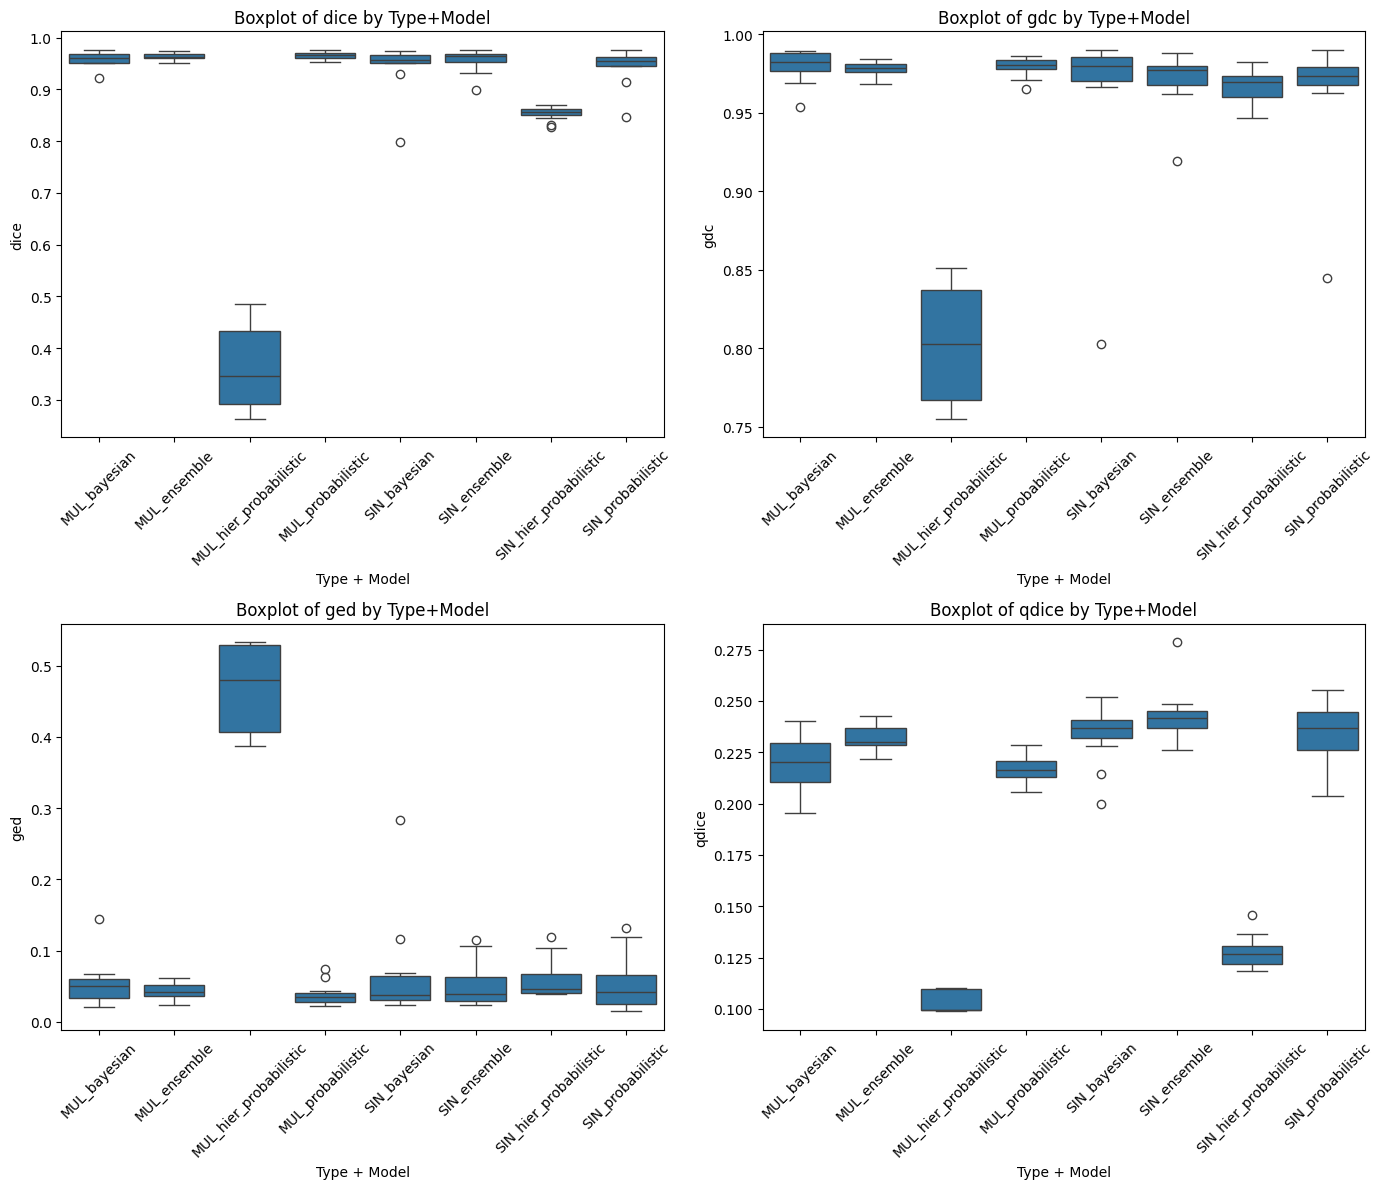

PROSTATE_TASK2


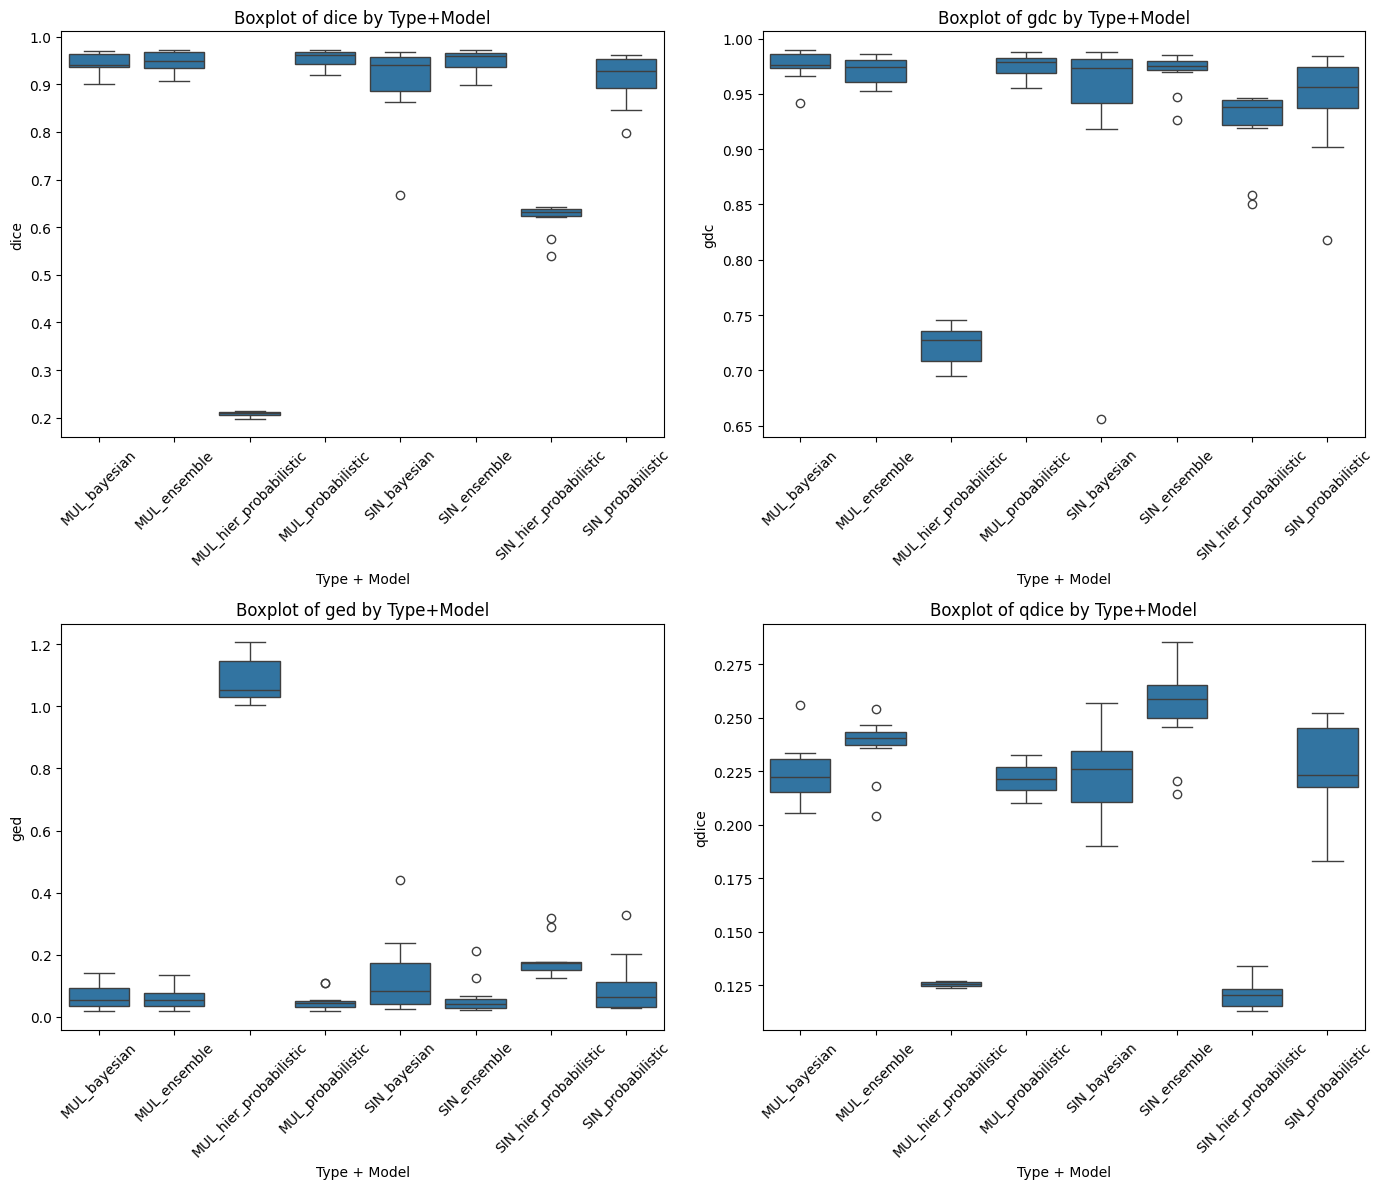

BRAIN_GROWTH


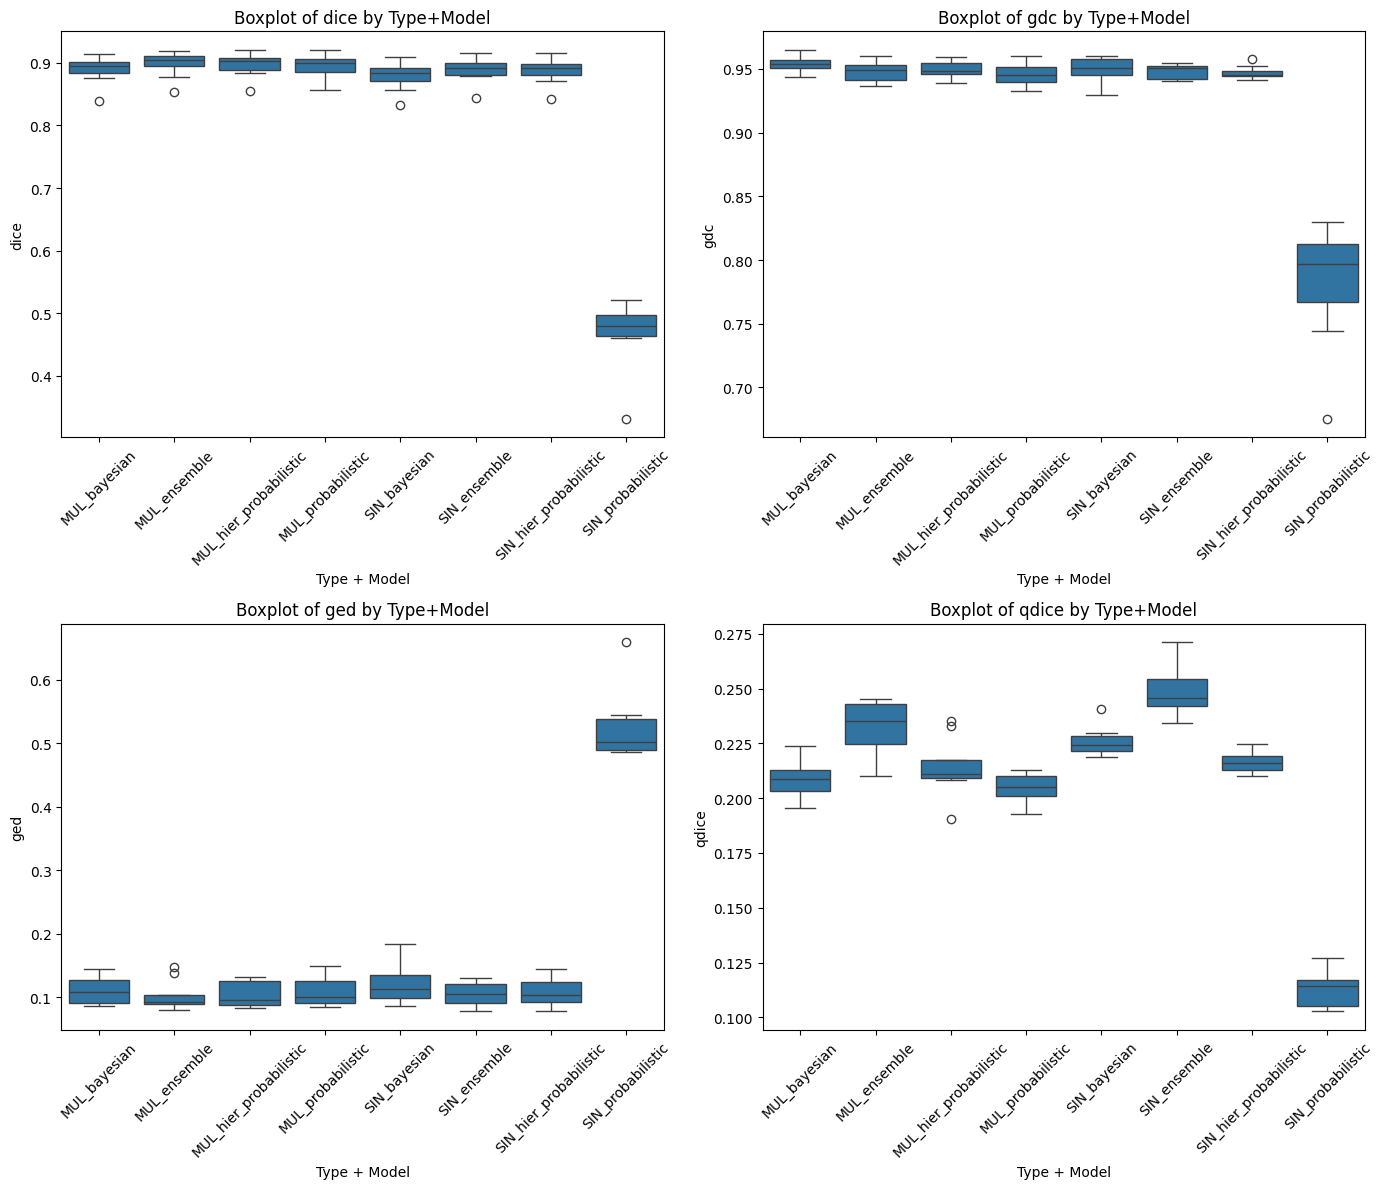

PANCREAS


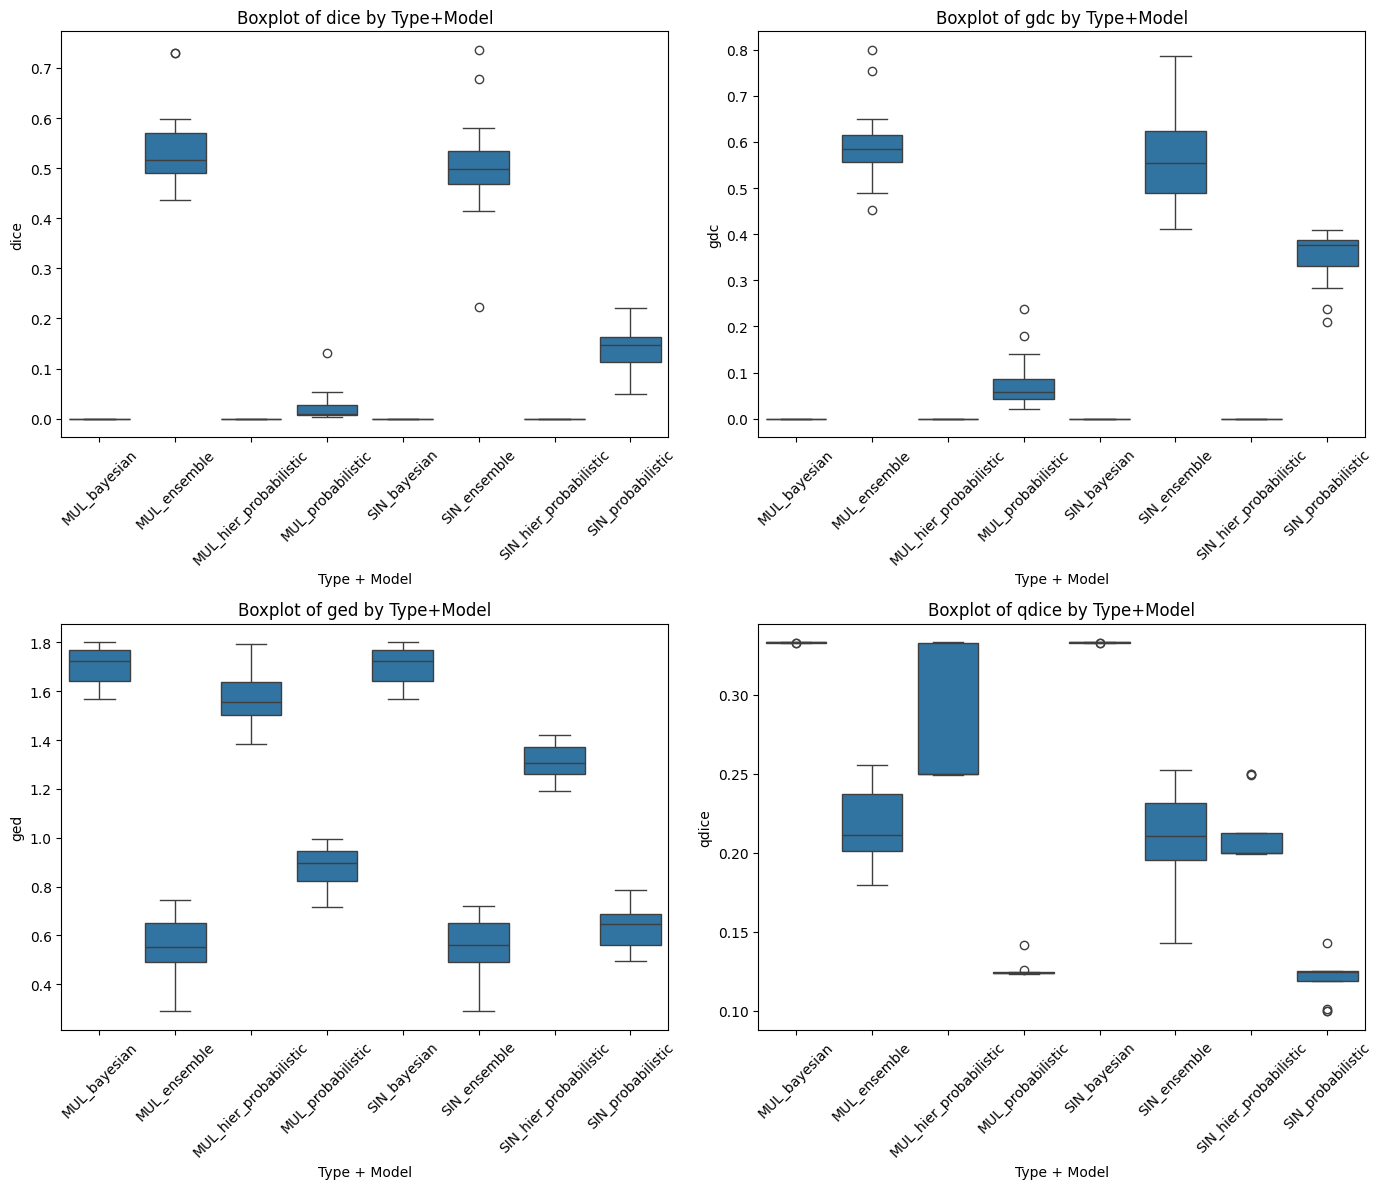

SIJ


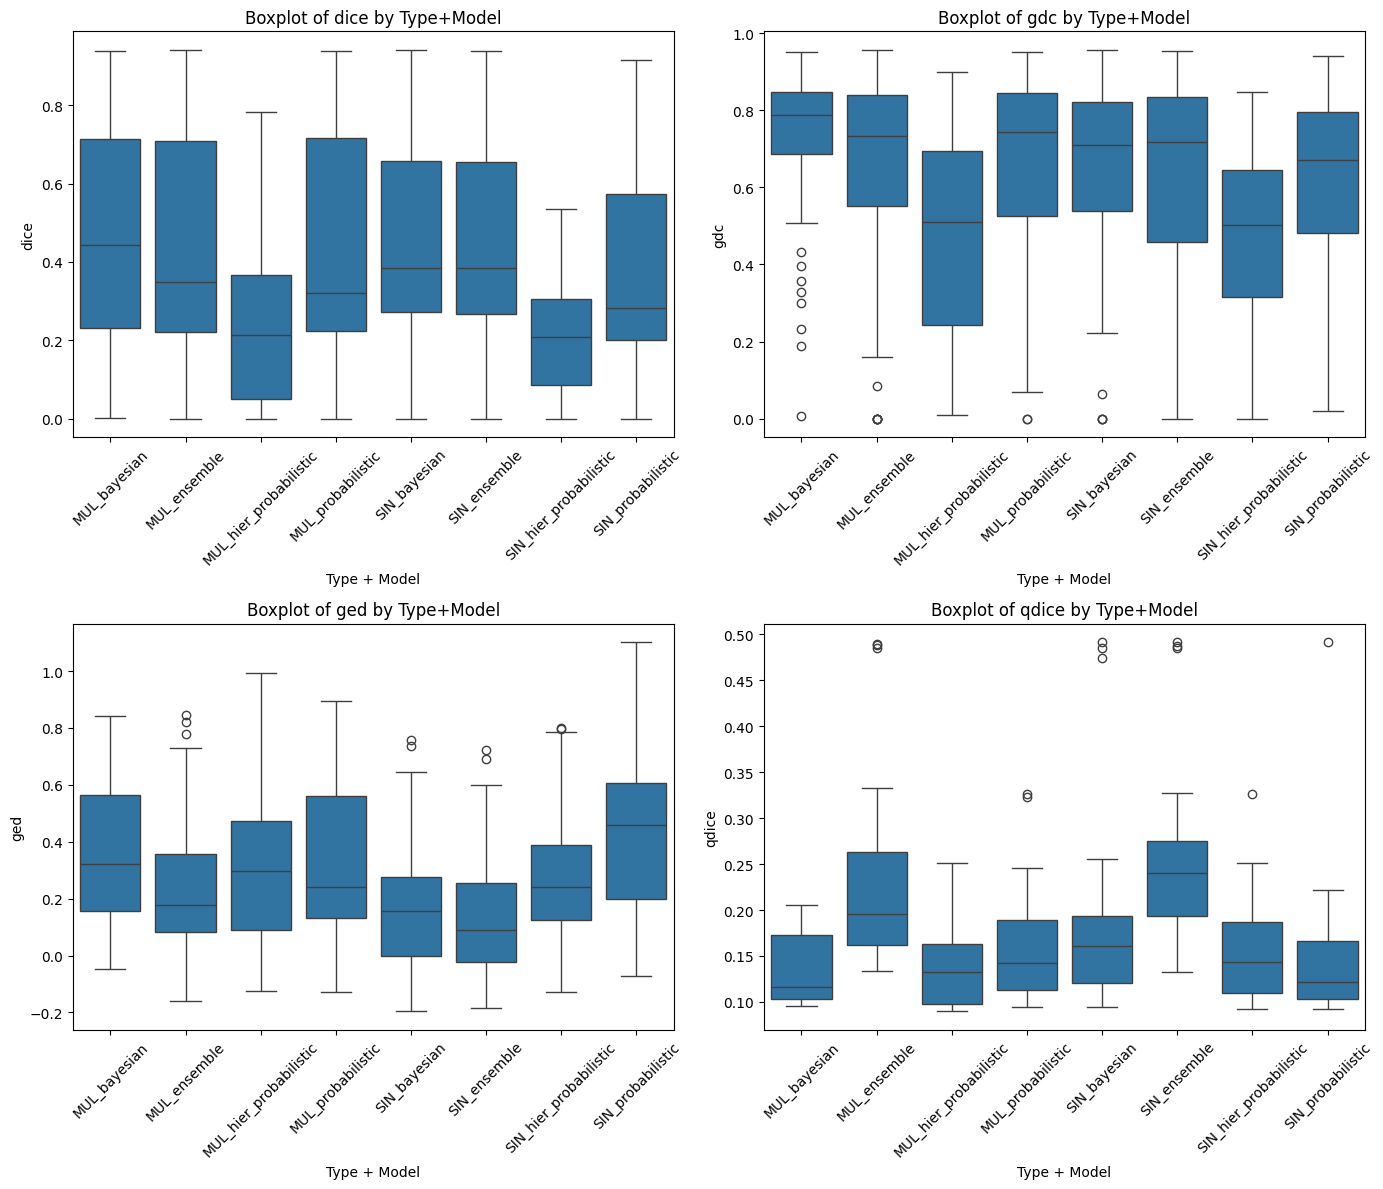

LUNG


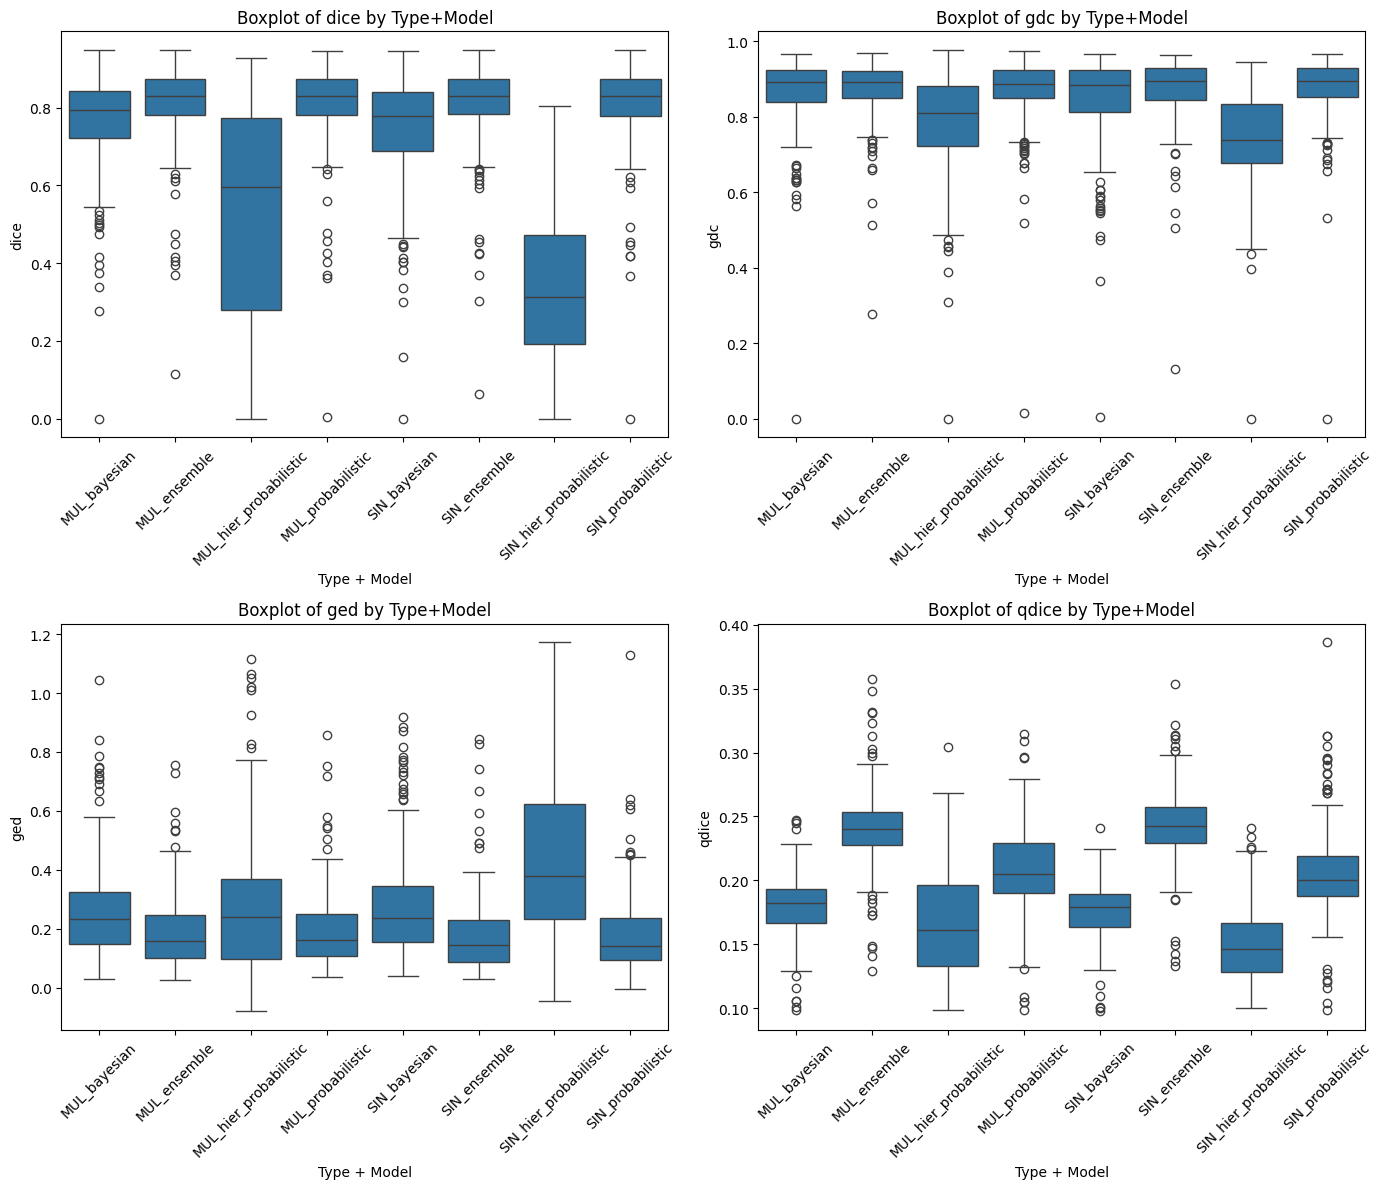

HEART


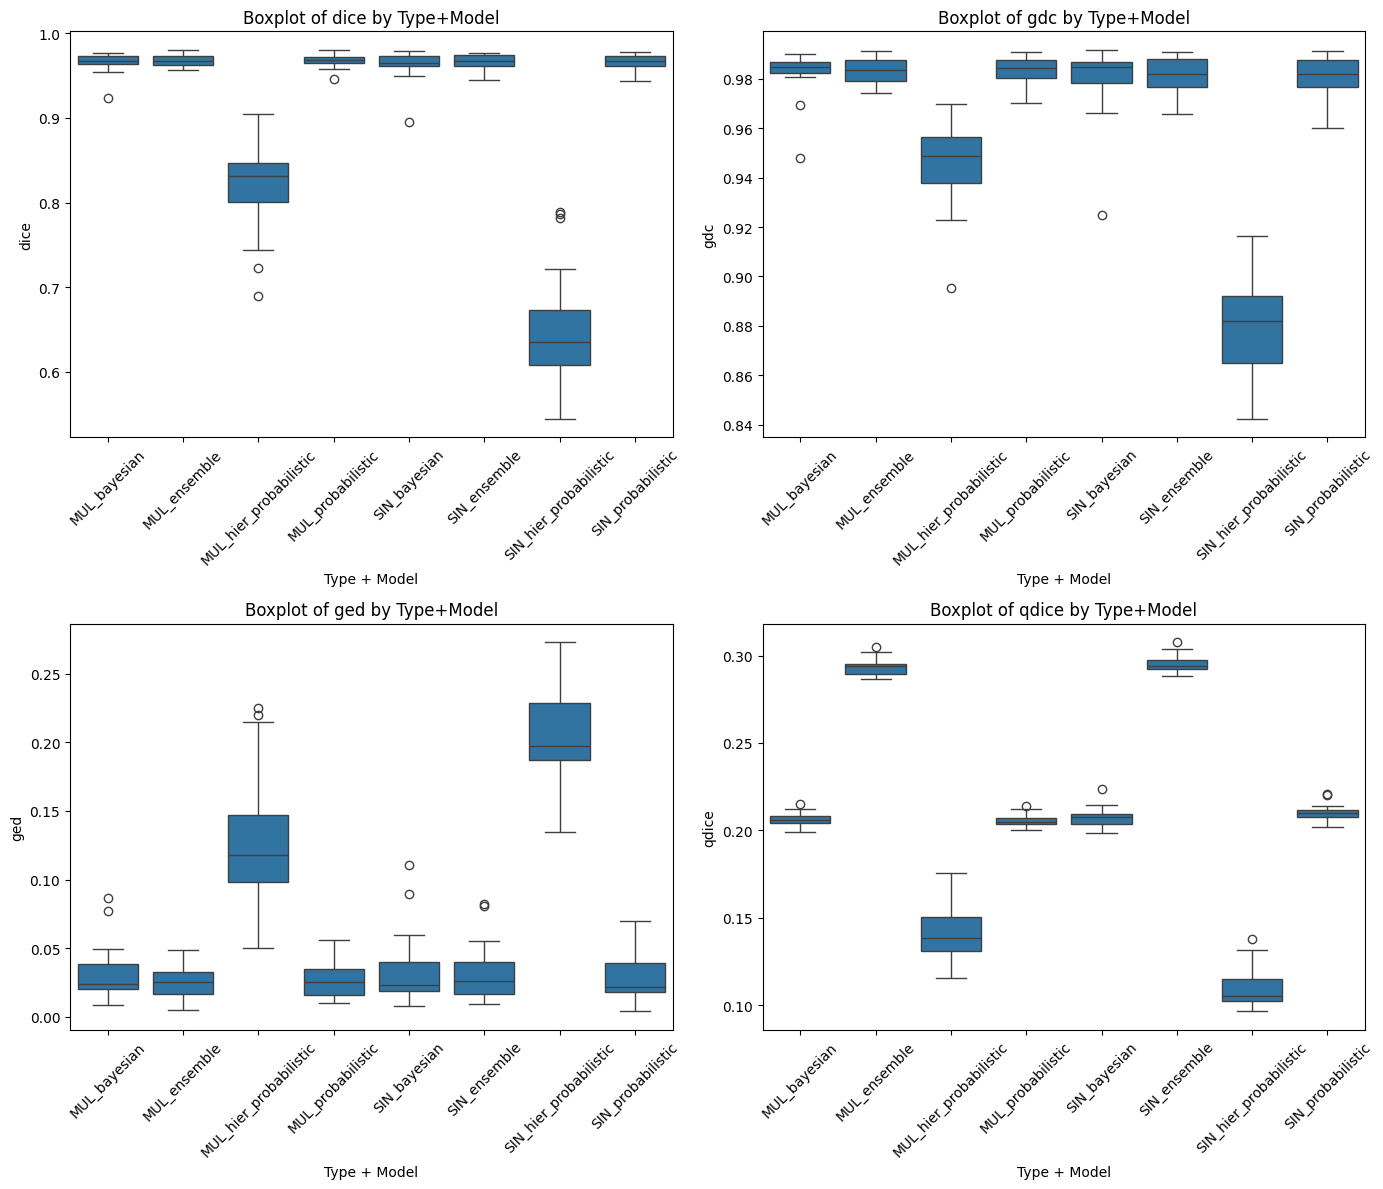

In [20]:
for dataset_name in dataset_detail.keys():
    
    print(dataset_name)
    df_draw= df_test_test[df_test_test["dataset"]==dataset_name]
    draw_boxplot(df_draw[(df_draw["segment"]==dataset_detail[dataset_name][0])])


# Direct Uncertainty

In [26]:
df_ensemble = df [df["model"]=="ensemble"]
len(df_ensemble)

3507

In [57]:
# "DIR","DSI","DMU"
df_show = df_ensemble[(df_ensemble["dataset"]=="KNEE") & df_ensemble["type"].isin(["DIR","DSI","DMU"])]
df_show

,id,dataset,segment,type,model,result,metric
14557,case_25,KNEE,KNEE,DIR,ensemble,0.752918,ndice
14558,case_25,KNEE,KNEE,DSI,ensemble,0.555585,ndice
14559,case_25,KNEE,KNEE,DMU,ensemble,0.589722,ndice
14560,case_25,KNEE,UNCERTAINTY,DIR,ensemble,0.500807,ndice
14561,case_25,KNEE,UNCERTAINTY,DSI,ensemble,0.336715,ndice
14562,case_25,KNEE,UNCERTAINTY,DMU,ensemble,0.355583,ndice
14563,case_4,KNEE,KNEE,DIR,ensemble,0.874002,ndice
14564,case_4,KNEE,KNEE,DSI,ensemble,0.688702,ndice
14565,case_4,KNEE,KNEE,DMU,ensemble,0.724525,ndice
14566,case_4,KNEE,UNCERTAINTY,DIR,ensemble,0.475410,ndice


In [58]:
df_show.groupby(["type","segment"]).agg({
    "result":["median"]
})

result
                    median
type segment              
DIR  KNEE         0.795071
     UNCERTAINTY  0.533491
DMU  KNEE         0.607489
     UNCERTAINTY  0.326457
DSI  KNEE         0.627896
     UNCERTAINTY  0.337476

In [30]:
def filter_df(dataset_name):
    df_test = df_ensemble[df_ensemble["dataset"]==dataset_name]
    # df_test.pivot_table(
    #     index=["type"],
    #     columns="metric",
    #     values="result",
    #     aggfunc="mean"
    # ).reset_index()

    df_test_test=df_test.pivot(
        index=["id","dataset", "type", "model", "segment"],
        columns="metric",
        values="result"
    ).reset_index()
    # df_test_test[df_test_test.columns.difference(['dataset', 'model','segment'])]
    df_test_test=df_test_test[["id","type","segment","ndice"]]
    # df_test_test=df_test_test[["id","type","segment","dice","gdc","ged","qdice"]]
    
    
    return df_test_test

In [31]:
def draw_boxplot(df):
    # metrics = ["dice", "gdc", "ged", "qdice"]
    metrics = ["ndice"]
    n_metrics = len(metrics)
    n_cols = 2
    n_rows = (n_metrics + 1) // n_cols  # Adjust rows to fit all plots

    # Set up the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows))
    axes = axes.flatten()

    # Create a boxplot for each metric
    for i, metric in enumerate(metrics):
        sns.boxplot(data=df, x="type", y=metric, ax=axes[i])
        axes[i].set_title(f"Boxplot of {metric} by type")
        axes[i].set_xlabel("Type")
        axes[i].set_ylabel(metric)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
for dataset_name in dataset_detail.keys():
    
    df_draw= filter_df(dataset_name)
    
    for dataset_segment in dataset_detail[dataset_name]:
        print(dataset_name,dataset_segment)
        if dataset_segment=="UNCERTAINTY":
            draw_boxplot(df_draw[(df_draw["segment"]==dataset_segment)])
        else:
            draw_boxplot(df_draw[(df_draw["segment"]==dataset_segment) 
                                #  & (df_draw["type"].isin(["DIR","MUL","SIN"]))
                                 ])
    # break